##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# pandas DataFrame を読み込む

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/pandas_dataframe"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org で表示</a>
</td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab で実行</a>
</td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub でソースを表示</a>
</td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a>   </td>
</table>

このチュートリアルでは、<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" class="external">pandas DataFrames</a> を TensorFlow に読み込む方法の例を示します。

このチュートリアルでは、UCI Machine Learning Repository が提供する小さな<a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">心臓疾患データセット</a>を使用します。CSV 形式で数百の行を含むデータセットです。各行は患者に関する情報で、列には属性が記述されています。この情報を使って、患者に心臓疾患があるかどうかを予測します。これは二項分類のタスクです。

## pandas を使ってデータを読み取る

In [2]:
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

2022-12-15 00:56:39.676822: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-15 00:56:39.676949: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-15 00:56:39.676959: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


心臓疾患データセットを含む CSV ファイルをダウンロードします。

In [3]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

 8192/13273 [=================>............] - ETA: 0s

13273/13273 [==============================] - 0s 0us/step


pandas を使って CSV を読み取ります。

In [4]:
df = pd.read_csv(csv_file)

データは以下のように表示されます。

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

`target` 列に含まれるラベルを予測するモデルを作成します。

In [7]:
target = df.pop('target')

## 配列としての DataFrame

データのデータ型が統一されている場合、または、`dtype` の場合、NumPy 配列を使用できる場合であればどこでも pandas DataFrame を使用できます。これは、`pandas.DataFrame` クラスが `__array__` プロトコルをサポートしているためであり、TensorFlow の `tf.convert_to_tensor` 関数がプロトコルをサポートするオブジェクトを受け入れるます。

データセットから数値特徴量を取得します (ここでは、カテゴリカル特徴量をスキップします)。

In [8]:
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

age  thalach  trestbps  chol  oldpeak
0   63      150       145   233      2.3
1   67      108       160   286      1.5
2   67      129       120   229      2.6
3   37      187       130   250      3.5
4   41      172       130   204      1.4

DataFrame は、`DataFrame.values` プロパティまたは `numpy.array(df)` を使用して NumPy 配列に変換できます。テンソルに変換するには、`tf.convert_to_tensor` を使用します。

In [9]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

一般に、オブジェクトを `tf.convert_to_tensor` でテンソルに変換すれば、`tf.Tensor` を渡せる場合は、同様に渡すことができます。

### Model.fit メソッド

単一のテンソルとして解釈される DataFrame は、`Model.fit` メソッドの引数として直接使用できます。

以下は、データセットの数値特徴に関するモデルのトレーニングの例です。

最初のステップは、入力範囲を正規化することです。そのために `tf.keras.layers.Normalization` レイヤーを使用します。

実行する前にレイヤーの平均と標準偏差を設定するには、必ず `Normalization.adapt` メソッドを呼び出してください。

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

DataFrame の最初の 3 行でレイヤーを呼び出して、このレイヤーからの出力のサンプルを視覚化します。

In [11]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93383914,  0.03480718,  0.74578077, -0.26008663,  1.0680453 ],
       [ 1.3782105 , -1.7806165 ,  1.5923285 ,  0.7573877 ,  0.38022864],
       [ 1.3782105 , -0.87290466, -0.6651321 , -0.33687714,  1.3259765 ]],
      dtype=float32)>

単純なモデルの最初のレイヤーとして正規化レイヤーを使用します。

In [12]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

DataFrame を `x` 引数として `Model.fit` に渡すと、Keras は DataFrame をNumPy 配列と同じように扱います。

In [13]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15


  1/152 [..............................] - ETA: 4:06 - loss: 0.5948 - accuracy: 1.0000

 19/152 [==>...........................] - ETA: 0s - loss: 0.7092 - accuracy: 0.6316  

 38/152 [======>.......................] - ETA: 0s - loss: 0.6816 - accuracy: 0.7237

 57/152 [==========>...................] - ETA: 0s - loss: 0.6655 - accuracy: 0.7544

 75/152 [=============>................] - ETA: 0s - loss: 0.6634 - accuracy: 0.7200

 94/152 [=================>............] - ETA: 0s - loss: 0.6665 - accuracy: 0.7128

112/152 [=====================>........] - ETA: 0s - loss: 0.6677 - accuracy: 0.7098

130/152 [========================>.....] - ETA: 0s - loss: 0.6736 - accuracy: 0.7077

149/152 [============================>.] - ETA: 0s - loss: 0.6612 - accuracy: 0.7215

152/152 [==============================] - 2s 3ms/step - loss: 0.6602 - accuracy: 0.7261


Epoch 2/15


  1/152 [..............................] - ETA: 0s - loss: 0.9993 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.7000

 39/152 [======>.......................] - ETA: 0s - loss: 0.6504 - accuracy: 0.7051

 58/152 [==========>...................] - ETA: 0s - loss: 0.6292 - accuracy: 0.7069

 77/152 [==============>...............] - ETA: 0s - loss: 0.6045 - accuracy: 0.7403

 96/152 [=================>............] - ETA: 0s - loss: 0.6087 - accuracy: 0.7396

115/152 [=====================>........] - ETA: 0s - loss: 0.5996 - accuracy: 0.7435

134/152 [=========================>....] - ETA: 0s - loss: 0.5921 - accuracy: 0.7313

152/152 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7327


Epoch 3/15


  1/152 [..............................] - ETA: 0s - loss: 0.7530 - accuracy: 0.5000

 21/152 [===>..........................] - ETA: 0s - loss: 0.5809 - accuracy: 0.7381

 40/152 [======>.......................] - ETA: 0s - loss: 0.5344 - accuracy: 0.7750

 59/152 [==========>...................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7627

 78/152 [==============>...............] - ETA: 0s - loss: 0.5289 - accuracy: 0.7628

 98/152 [==================>...........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7551

117/152 [======================>.......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7436

137/152 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7409

152/152 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7393


Epoch 4/15


  1/152 [..............................] - ETA: 0s - loss: 0.2686 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.8000

 39/152 [======>.......................] - ETA: 0s - loss: 0.5793 - accuracy: 0.7308

 58/152 [==========>...................] - ETA: 0s - loss: 0.5445 - accuracy: 0.7328

 77/152 [==============>...............] - ETA: 0s - loss: 0.5381 - accuracy: 0.7143

 96/152 [=================>............] - ETA: 0s - loss: 0.5327 - accuracy: 0.7344

116/152 [=====================>........] - ETA: 0s - loss: 0.5222 - accuracy: 0.7457

136/152 [=========================>....] - ETA: 0s - loss: 0.5000 - accuracy: 0.7537

152/152 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7459


Epoch 5/15


  1/152 [..............................] - ETA: 0s - loss: 0.9189 - accuracy: 0.0000e+00

 20/152 [==>...........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.8250    

 39/152 [======>.......................] - ETA: 0s - loss: 0.4537 - accuracy: 0.7821

 58/152 [==========>...................] - ETA: 0s - loss: 0.4938 - accuracy: 0.7414

 77/152 [==============>...............] - ETA: 0s - loss: 0.5269 - accuracy: 0.7273

 96/152 [=================>............] - ETA: 0s - loss: 0.5050 - accuracy: 0.7448

115/152 [=====================>........] - ETA: 0s - loss: 0.5066 - accuracy: 0.7565

134/152 [=========================>....] - ETA: 0s - loss: 0.4960 - accuracy: 0.7575

152/152 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7657


Epoch 6/15


  1/152 [..............................] - ETA: 0s - loss: 0.2460 - accuracy: 1.0000

 21/152 [===>..........................] - ETA: 0s - loss: 0.4495 - accuracy: 0.7857

 40/152 [======>.......................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7375

 59/152 [==========>...................] - ETA: 0s - loss: 0.4950 - accuracy: 0.7542

 78/152 [==============>...............] - ETA: 0s - loss: 0.4857 - accuracy: 0.7500

 97/152 [==================>...........] - ETA: 0s - loss: 0.4887 - accuracy: 0.7526

116/152 [=====================>........] - ETA: 0s - loss: 0.4862 - accuracy: 0.7586

135/152 [=========================>....] - ETA: 0s - loss: 0.4802 - accuracy: 0.7556

152/152 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7690


Epoch 7/15


  1/152 [..............................] - ETA: 0s - loss: 0.4392 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4462 - accuracy: 0.7500

 39/152 [======>.......................] - ETA: 0s - loss: 0.4563 - accuracy: 0.7179

 58/152 [==========>...................] - ETA: 0s - loss: 0.4523 - accuracy: 0.7500

 77/152 [==============>...............] - ETA: 0s - loss: 0.4369 - accuracy: 0.7857

 96/152 [=================>............] - ETA: 0s - loss: 0.4421 - accuracy: 0.8021

115/152 [=====================>........] - ETA: 0s - loss: 0.4431 - accuracy: 0.7826

134/152 [=========================>....] - ETA: 0s - loss: 0.4655 - accuracy: 0.7836

152/152 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7756


Epoch 8/15


  1/152 [..............................] - ETA: 0s - loss: 1.0167 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.5078 - accuracy: 0.7500

 39/152 [======>.......................] - ETA: 0s - loss: 0.5452 - accuracy: 0.7051

 58/152 [==========>...................] - ETA: 0s - loss: 0.4807 - accuracy: 0.7672

 77/152 [==============>...............] - ETA: 0s - loss: 0.4640 - accuracy: 0.7792

 96/152 [=================>............] - ETA: 0s - loss: 0.4556 - accuracy: 0.7760

115/152 [=====================>........] - ETA: 0s - loss: 0.4562 - accuracy: 0.7870

134/152 [=========================>....] - ETA: 0s - loss: 0.4524 - accuracy: 0.7799

152/152 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7789


Epoch 9/15


  1/152 [..............................] - ETA: 0s - loss: 0.2124 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.7750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4594 - accuracy: 0.7564

 58/152 [==========>...................] - ETA: 0s - loss: 0.4335 - accuracy: 0.7845

 77/152 [==============>...............] - ETA: 0s - loss: 0.4096 - accuracy: 0.8117

 96/152 [=================>............] - ETA: 0s - loss: 0.4339 - accuracy: 0.7917

115/152 [=====================>........] - ETA: 0s - loss: 0.4290 - accuracy: 0.7957

135/152 [=========================>....] - ETA: 0s - loss: 0.4343 - accuracy: 0.7926

152/152 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.7822


Epoch 10/15


  1/152 [..............................] - ETA: 0s - loss: 0.8298 - accuracy: 0.5000

 21/152 [===>..........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.7381

 40/152 [======>.......................] - ETA: 0s - loss: 0.4280 - accuracy: 0.7500

 59/152 [==========>...................] - ETA: 0s - loss: 0.3872 - accuracy: 0.7627

 78/152 [==============>...............] - ETA: 0s - loss: 0.4203 - accuracy: 0.7628

 98/152 [==================>...........] - ETA: 0s - loss: 0.4414 - accuracy: 0.7806

117/152 [======================>.......] - ETA: 0s - loss: 0.4466 - accuracy: 0.7778

136/152 [=========================>....] - ETA: 0s - loss: 0.4398 - accuracy: 0.7904

152/152 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.7822


Epoch 11/15


  1/152 [..............................] - ETA: 0s - loss: 0.3455 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.8000

 39/152 [======>.......................] - ETA: 0s - loss: 0.3971 - accuracy: 0.8077

 58/152 [==========>...................] - ETA: 0s - loss: 0.4073 - accuracy: 0.7931

 77/152 [==============>...............] - ETA: 0s - loss: 0.4014 - accuracy: 0.7857

 95/152 [=================>............] - ETA: 0s - loss: 0.3979 - accuracy: 0.8053

114/152 [=====================>........] - ETA: 0s - loss: 0.4194 - accuracy: 0.8026

133/152 [=========================>....] - ETA: 0s - loss: 0.4406 - accuracy: 0.7932

152/152 [==============================] - ETA: 0s - loss: 0.4407 - accuracy: 0.7855

152/152 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.7855


Epoch 12/15


  1/152 [..............................] - ETA: 0s - loss: 0.2225 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3539 - accuracy: 0.8500

 39/152 [======>.......................] - ETA: 0s - loss: 0.3822 - accuracy: 0.8077

 58/152 [==========>...................] - ETA: 0s - loss: 0.3954 - accuracy: 0.8103

 77/152 [==============>...............] - ETA: 0s - loss: 0.4331 - accuracy: 0.7792

 96/152 [=================>............] - ETA: 0s - loss: 0.4292 - accuracy: 0.7865

115/152 [=====================>........] - ETA: 0s - loss: 0.4172 - accuracy: 0.8000

134/152 [=========================>....] - ETA: 0s - loss: 0.4320 - accuracy: 0.7910

152/152 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.7921


Epoch 13/15


  1/152 [..............................] - ETA: 0s - loss: 0.5480 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8500

 39/152 [======>.......................] - ETA: 0s - loss: 0.4285 - accuracy: 0.8205

 58/152 [==========>...................] - ETA: 0s - loss: 0.4475 - accuracy: 0.7931

 77/152 [==============>...............] - ETA: 0s - loss: 0.4769 - accuracy: 0.7792

 96/152 [=================>............] - ETA: 0s - loss: 0.4795 - accuracy: 0.7656

114/152 [=====================>........] - ETA: 0s - loss: 0.4658 - accuracy: 0.7807

132/152 [=========================>....] - ETA: 0s - loss: 0.4502 - accuracy: 0.7879

151/152 [============================>.] - ETA: 0s - loss: 0.4347 - accuracy: 0.7980

152/152 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7987


Epoch 14/15


  1/152 [..............................] - ETA: 0s - loss: 0.8977 - accuracy: 0.5000

 21/152 [===>..........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.8571

 40/152 [======>.......................] - ETA: 0s - loss: 0.4430 - accuracy: 0.8250

 59/152 [==========>...................] - ETA: 0s - loss: 0.4068 - accuracy: 0.8305

 79/152 [==============>...............] - ETA: 0s - loss: 0.4010 - accuracy: 0.8228

 98/152 [==================>...........] - ETA: 0s - loss: 0.3870 - accuracy: 0.8265

117/152 [======================>.......] - ETA: 0s - loss: 0.4179 - accuracy: 0.8034

136/152 [=========================>....] - ETA: 0s - loss: 0.4383 - accuracy: 0.7941

152/152 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7954


Epoch 15/15


  1/152 [..............................] - ETA: 0s - loss: 0.6566 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.8250

 39/152 [======>.......................] - ETA: 0s - loss: 0.3859 - accuracy: 0.8462

 58/152 [==========>...................] - ETA: 0s - loss: 0.4346 - accuracy: 0.8190

 77/152 [==============>...............] - ETA: 0s - loss: 0.4107 - accuracy: 0.8182

 97/152 [==================>...........] - ETA: 0s - loss: 0.4251 - accuracy: 0.7938

117/152 [======================>.......] - ETA: 0s - loss: 0.4332 - accuracy: 0.7906

137/152 [==========================>...] - ETA: 0s - loss: 0.4375 - accuracy: 0.7920

152/152 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.7987


### tf.data を適用する

`tf.data` 変換を均一な `dtype` の DataFrame に適用する場合、`Dataset.from_tensor_slices` メソッドは、DataFrame の行を反復処理するデータセットを作成します。各行は、最初は値のベクトルです。モデルをトレーニングするには、`(inputs, labels)` のペアが必要なので、`(features, labels)` と `Dataset.from_tensor_slices` を渡し、必要なスライスのペアを取得します。

In [14]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(3):
  print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [15]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15


  1/152 [..............................] - ETA: 2:36 - loss: 0.8534 - accuracy: 0.5000

 19/152 [==>...........................] - ETA: 0s - loss: 0.7658 - accuracy: 0.6842  

 38/152 [======>.......................] - ETA: 0s - loss: 0.7336 - accuracy: 0.7763

 57/152 [==========>...................] - ETA: 0s - loss: 0.7317 - accuracy: 0.7544

 77/152 [==============>...............] - ETA: 0s - loss: 0.7191 - accuracy: 0.7532

 97/152 [==================>...........] - ETA: 0s - loss: 0.7055 - accuracy: 0.7526

117/152 [======================>.......] - ETA: 0s - loss: 0.7020 - accuracy: 0.7393

136/152 [=========================>....] - ETA: 0s - loss: 0.6961 - accuracy: 0.7243

152/152 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.7327


Epoch 2/15


  1/152 [..............................] - ETA: 0s - loss: 0.5486 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.6500

 40/152 [======>.......................] - ETA: 0s - loss: 0.6136 - accuracy: 0.7125

 60/152 [==========>...................] - ETA: 0s - loss: 0.6156 - accuracy: 0.7167

 80/152 [==============>...............] - ETA: 0s - loss: 0.6221 - accuracy: 0.6938

 99/152 [==================>...........] - ETA: 0s - loss: 0.6090 - accuracy: 0.7121

119/152 [======================>.......] - ETA: 0s - loss: 0.6058 - accuracy: 0.7101

138/152 [==========================>...] - ETA: 0s - loss: 0.5947 - accuracy: 0.7283

152/152 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.7360


Epoch 3/15


  1/152 [..............................] - ETA: 0s - loss: 0.5760 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4904 - accuracy: 0.8500

 39/152 [======>.......................] - ETA: 0s - loss: 0.5213 - accuracy: 0.7949

 59/152 [==========>...................] - ETA: 0s - loss: 0.5168 - accuracy: 0.7881

 78/152 [==============>...............] - ETA: 0s - loss: 0.5228 - accuracy: 0.7756

 97/152 [==================>...........] - ETA: 0s - loss: 0.5117 - accuracy: 0.7784

116/152 [=====================>........] - ETA: 0s - loss: 0.5129 - accuracy: 0.7629

136/152 [=========================>....] - ETA: 0s - loss: 0.5131 - accuracy: 0.7500

152/152 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.7492


Epoch 4/15


  1/152 [..............................] - ETA: 0s - loss: 1.4492 - accuracy: 0.0000e+00

 21/152 [===>..........................] - ETA: 0s - loss: 0.6113 - accuracy: 0.7143    

 40/152 [======>.......................] - ETA: 0s - loss: 0.5642 - accuracy: 0.7125

 59/152 [==========>...................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7288

 78/152 [==============>...............] - ETA: 0s - loss: 0.5092 - accuracy: 0.7436

 97/152 [==================>...........] - ETA: 0s - loss: 0.4932 - accuracy: 0.7423

116/152 [=====================>........] - ETA: 0s - loss: 0.4769 - accuracy: 0.7543

136/152 [=========================>....] - ETA: 0s - loss: 0.4679 - accuracy: 0.7610

152/152 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7591


Epoch 5/15


  1/152 [..............................] - ETA: 0s - loss: 0.4268 - accuracy: 1.0000

 21/152 [===>..........................] - ETA: 0s - loss: 0.5599 - accuracy: 0.6190

 40/152 [======>.......................] - ETA: 0s - loss: 0.4411 - accuracy: 0.7500

 59/152 [==========>...................] - ETA: 0s - loss: 0.4438 - accuracy: 0.7542

 78/152 [==============>...............] - ETA: 0s - loss: 0.4584 - accuracy: 0.7436

 97/152 [==================>...........] - ETA: 0s - loss: 0.4485 - accuracy: 0.7526

116/152 [=====================>........] - ETA: 0s - loss: 0.4676 - accuracy: 0.7629

135/152 [=========================>....] - ETA: 0s - loss: 0.4492 - accuracy: 0.7778

152/152 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7723


Epoch 6/15


  1/152 [..............................] - ETA: 0s - loss: 0.4107 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.7250

 39/152 [======>.......................] - ETA: 0s - loss: 0.4429 - accuracy: 0.7436

 58/152 [==========>...................] - ETA: 0s - loss: 0.4210 - accuracy: 0.7931

 78/152 [==============>...............] - ETA: 0s - loss: 0.4423 - accuracy: 0.7628

 97/152 [==================>...........] - ETA: 0s - loss: 0.4475 - accuracy: 0.7577

116/152 [=====================>........] - ETA: 0s - loss: 0.4409 - accuracy: 0.7672

135/152 [=========================>....] - ETA: 0s - loss: 0.4507 - accuracy: 0.7667

152/152 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7723


Epoch 7/15


  1/152 [..............................] - ETA: 0s - loss: 0.2219 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3881 - accuracy: 0.8750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4306 - accuracy: 0.8077

 58/152 [==========>...................] - ETA: 0s - loss: 0.4470 - accuracy: 0.8017

 77/152 [==============>...............] - ETA: 0s - loss: 0.4624 - accuracy: 0.7857

 96/152 [=================>............] - ETA: 0s - loss: 0.4486 - accuracy: 0.7917

115/152 [=====================>........] - ETA: 0s - loss: 0.4368 - accuracy: 0.7739

135/152 [=========================>....] - ETA: 0s - loss: 0.4409 - accuracy: 0.7630

152/152 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7723


Epoch 8/15


  1/152 [..............................] - ETA: 0s - loss: 0.8490 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.7250

 39/152 [======>.......................] - ETA: 0s - loss: 0.4153 - accuracy: 0.7949

 58/152 [==========>...................] - ETA: 0s - loss: 0.4124 - accuracy: 0.8190

 78/152 [==============>...............] - ETA: 0s - loss: 0.4417 - accuracy: 0.7885

 98/152 [==================>...........] - ETA: 0s - loss: 0.4264 - accuracy: 0.8010

118/152 [======================>.......] - ETA: 0s - loss: 0.4545 - accuracy: 0.7712

138/152 [==========================>...] - ETA: 0s - loss: 0.4315 - accuracy: 0.7790

152/152 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.7756


Epoch 9/15


  1/152 [..............................] - ETA: 0s - loss: 0.1152 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8000

 39/152 [======>.......................] - ETA: 0s - loss: 0.3865 - accuracy: 0.7949

 58/152 [==========>...................] - ETA: 0s - loss: 0.4174 - accuracy: 0.7931

 77/152 [==============>...............] - ETA: 0s - loss: 0.4476 - accuracy: 0.7792

 95/152 [=================>............] - ETA: 0s - loss: 0.4345 - accuracy: 0.7842

114/152 [=====================>........] - ETA: 0s - loss: 0.4235 - accuracy: 0.7851

133/152 [=========================>....] - ETA: 0s - loss: 0.4324 - accuracy: 0.7820

152/152 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.7822

152/152 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.7822


Epoch 10/15


  1/152 [..............................] - ETA: 0s - loss: 0.0995 - accuracy: 1.0000

 21/152 [===>..........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8095

 40/152 [======>.......................] - ETA: 0s - loss: 0.3789 - accuracy: 0.7750

 59/152 [==========>...................] - ETA: 0s - loss: 0.3768 - accuracy: 0.7881

 78/152 [==============>...............] - ETA: 0s - loss: 0.4246 - accuracy: 0.7821

 97/152 [==================>...........] - ETA: 0s - loss: 0.4399 - accuracy: 0.7629

116/152 [=====================>........] - ETA: 0s - loss: 0.4280 - accuracy: 0.7802

136/152 [=========================>....] - ETA: 0s - loss: 0.4225 - accuracy: 0.7868

152/152 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.7888


Epoch 11/15


  1/152 [..............................] - ETA: 0s - loss: 0.5802 - accuracy: 0.5000

 21/152 [===>..........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.7619

 40/152 [======>.......................] - ETA: 0s - loss: 0.4103 - accuracy: 0.8125

 59/152 [==========>...................] - ETA: 0s - loss: 0.4017 - accuracy: 0.7881

 78/152 [==============>...............] - ETA: 0s - loss: 0.4355 - accuracy: 0.7500

 97/152 [==================>...........] - ETA: 0s - loss: 0.4029 - accuracy: 0.7784

116/152 [=====================>........] - ETA: 0s - loss: 0.4016 - accuracy: 0.7845

135/152 [=========================>....] - ETA: 0s - loss: 0.3988 - accuracy: 0.8000

152/152 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.7888


Epoch 12/15


  1/152 [..............................] - ETA: 0s - loss: 1.1023 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.7750

 39/152 [======>.......................] - ETA: 0s - loss: 0.4720 - accuracy: 0.7436

 58/152 [==========>...................] - ETA: 0s - loss: 0.4616 - accuracy: 0.7500

 77/152 [==============>...............] - ETA: 0s - loss: 0.4698 - accuracy: 0.7597

 96/152 [=================>............] - ETA: 0s - loss: 0.4510 - accuracy: 0.7656

116/152 [=====================>........] - ETA: 0s - loss: 0.4332 - accuracy: 0.7716

136/152 [=========================>....] - ETA: 0s - loss: 0.4291 - accuracy: 0.7831

152/152 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7822


Epoch 13/15


  1/152 [..............................] - ETA: 0s - loss: 0.3838 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.8000

 39/152 [======>.......................] - ETA: 0s - loss: 0.4075 - accuracy: 0.8077

 59/152 [==========>...................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8305

 79/152 [==============>...............] - ETA: 0s - loss: 0.4044 - accuracy: 0.8165

 99/152 [==================>...........] - ETA: 0s - loss: 0.4009 - accuracy: 0.8182

118/152 [======================>.......] - ETA: 0s - loss: 0.4016 - accuracy: 0.8220

137/152 [==========================>...] - ETA: 0s - loss: 0.4151 - accuracy: 0.8066

152/152 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7987


Epoch 14/15


  1/152 [..............................] - ETA: 0s - loss: 0.5249 - accuracy: 1.0000

 20/152 [==>...........................] - ETA: 0s - loss: 0.4016 - accuracy: 0.8250

 39/152 [======>.......................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8077

 58/152 [==========>...................] - ETA: 0s - loss: 0.4431 - accuracy: 0.8017

 77/152 [==============>...............] - ETA: 0s - loss: 0.4353 - accuracy: 0.8052

 96/152 [=================>............] - ETA: 0s - loss: 0.4256 - accuracy: 0.8073

115/152 [=====================>........] - ETA: 0s - loss: 0.4151 - accuracy: 0.7913

134/152 [=========================>....] - ETA: 0s - loss: 0.4245 - accuracy: 0.7873

152/152 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7921


Epoch 15/15


  1/152 [..............................] - ETA: 0s - loss: 0.3712 - accuracy: 0.5000

 20/152 [==>...........................] - ETA: 0s - loss: 0.3740 - accuracy: 0.7750

 39/152 [======>.......................] - ETA: 0s - loss: 0.3956 - accuracy: 0.7821

 58/152 [==========>...................] - ETA: 0s - loss: 0.4173 - accuracy: 0.7845

 77/152 [==============>...............] - ETA: 0s - loss: 0.3849 - accuracy: 0.7987

 96/152 [=================>............] - ETA: 0s - loss: 0.3905 - accuracy: 0.7969

114/152 [=====================>........] - ETA: 0s - loss: 0.4083 - accuracy: 0.7895

133/152 [=========================>....] - ETA: 0s - loss: 0.4159 - accuracy: 0.7932

151/152 [============================>.] - ETA: 0s - loss: 0.4217 - accuracy: 0.7947

152/152 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.7954


## ディレクトリとしての DataFrame

型が異なるデータを処理する場合、DataFrame を単一の配列であるかのように扱うことができなくなります。TensorFlow テンソルでは、すべての要素が同じ `dtype` である必要があります。

したがって、この場合、各列が均一な dtype を持つ列のディクショナリとして扱う必要があります。DataFrame は配列のディクショナリによく似ているため、通常、必要なのは DataFrame を Python dict にキャストするだけです。多くの重要な TensorFlow API は、配列の (ネストされた) ディクショナリを入力としてサポートしています。

`tf.data` 入力パイプラインはこれを非常にうまく処理します。すべての `tf.data` 演算は、ディクショナリとタプルを自動的に処理するので、DataFrame からディクショナリのサンプルのデータセットを作成するには、`Dataset.from_tensor_slices`  でスライスする前に、それをディクショナリにキャストするだけです。

In [16]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))

以下はデータセットの最初の 3 つのサンプルです。

In [17]:
for row in numeric_dict_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(), dtype=int64, numpy=63>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=150>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=145>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=233>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.3>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=286>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.5>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=129>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=229>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.6>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


### Keras のディクショナリ

通常、Keras モデルとレイヤーは単一の入力テンソルを期待しますが、これらのクラスはディクショナリ、タプル、テンソルのネストされた構造を受け入れて返すことができます。これらの構造は「ネスト」と呼ばれます (詳細については、`tf.nest` モジュールを参照してください)。

ディクショナリを入力として受け入れる Keras モデルを作成するには、2 つの同等の方法があります。

#### 1. モデルサブクラススタイル

`tf.keras.Model` (または `tf.keras.Layer`) のサブクラスを記述します。入力を直接処理し、出力を作成します。

In [18]:
  def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
      values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)

In [19]:
#@title
class MyModel(tf.keras.Model):
  def __init__(self):
    # Create all the internal layers in init.
    super().__init__(self)

    self.normalizer = tf.keras.layers.Normalization(axis=-1)

    self.seq = tf.keras.Sequential([
      self.normalizer,
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

  def adapt(self, inputs):
    # Stack the inputs and `adapt` the normalization layer.
    inputs = stack_dict(inputs)
    self.normalizer.adapt(inputs)

  def call(self, inputs):
    # Stack the inputs
    inputs = stack_dict(inputs)
    # Run them through all the layers.
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(dict(numeric_features))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

このモデルは、トレーニング用の列のディクショナリまたはディクショナリ要素のデータセットのいずれかを受け入れることができます。

In [20]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 [..............................] - ETA: 1:47 - loss: 0.5789 - accuracy: 0.5000

  3/152 [..............................] - ETA: 4s - loss: 0.7779 - accuracy: 0.5000  

  6/152 [>.............................] - ETA: 3s - loss: 0.7681 - accuracy: 0.6667

  9/152 [>.............................] - ETA: 3s - loss: 0.7840 - accuracy: 0.6111

 12/152 [=>............................] - ETA: 3s - loss: 0.7866 - accuracy: 0.5833

 15/152 [=>............................] - ETA: 3s - loss: 0.7894 - accuracy: 0.5667

 18/152 [==>...........................] - ETA: 3s - loss: 0.7732 - accuracy: 0.5833

 21/152 [===>..........................] - ETA: 3s - loss: 0.7668 - accuracy: 0.6190

 24/152 [===>..........................] - ETA: 3s - loss: 0.7497 - accuracy: 0.6250

 27/152 [====>.........................] - ETA: 3s - loss: 0.7464 - accuracy: 0.6111

 30/152 [====>.........................] - ETA: 3s - loss: 0.7372 - accuracy: 0.6500

 33/152 [=====>........................] - ETA: 2s - loss: 0.7381 - accuracy: 0.6818

 36/152 [======>.......................] - ETA: 2s - loss: 0.7319 - accuracy: 0.7083

 39/152 [======>.......................] - ETA: 2s - loss: 0.7296 - accuracy: 0.7051

 41/152 [=======>......................] - ETA: 2s - loss: 0.7382 - accuracy: 0.7073

 44/152 [=======>......................] - ETA: 2s - loss: 0.7423 - accuracy: 0.6705

 46/152 [========>.....................] - ETA: 2s - loss: 0.7477 - accuracy: 0.6739

 48/152 [========>.....................] - ETA: 2s - loss: 0.7425 - accuracy: 0.6771

 50/152 [========>.....................] - ETA: 2s - loss: 0.7450 - accuracy: 0.6800

 52/152 [=========>....................] - ETA: 2s - loss: 0.7478 - accuracy: 0.6827

 55/152 [=========>....................] - ETA: 2s - loss: 0.7548 - accuracy: 0.6818

 58/152 [==========>...................] - ETA: 2s - loss: 0.7493 - accuracy: 0.6810

 60/152 [==========>...................] - ETA: 2s - loss: 0.7592 - accuracy: 0.6750

 63/152 [===========>..................] - ETA: 2s - loss: 0.7595 - accuracy: 0.6746

 66/152 [============>.................] - ETA: 2s - loss: 0.7575 - accuracy: 0.6818

 69/152 [============>.................] - ETA: 2s - loss: 0.7583 - accuracy: 0.6884

 72/152 [=============>................] - ETA: 1s - loss: 0.7532 - accuracy: 0.7014

 75/152 [=============>................] - ETA: 1s - loss: 0.7522 - accuracy: 0.7000

 78/152 [==============>...............] - ETA: 1s - loss: 0.7518 - accuracy: 0.6923

 81/152 [==============>...............] - ETA: 1s - loss: 0.7504 - accuracy: 0.6914

 84/152 [===============>..............] - ETA: 1s - loss: 0.7481 - accuracy: 0.7024

 87/152 [================>.............] - ETA: 1s - loss: 0.7438 - accuracy: 0.7011

 90/152 [================>.............] - ETA: 1s - loss: 0.7405 - accuracy: 0.7056

 93/152 [=================>............] - ETA: 1s - loss: 0.7391 - accuracy: 0.7043

 96/152 [=================>............] - ETA: 1s - loss: 0.7364 - accuracy: 0.7031

 99/152 [==================>...........] - ETA: 1s - loss: 0.7369 - accuracy: 0.6970

102/152 [===================>..........] - ETA: 1s - loss: 0.7357 - accuracy: 0.6961

105/152 [===================>..........] - ETA: 1s - loss: 0.7364 - accuracy: 0.6952

108/152 [====================>.........] - ETA: 1s - loss: 0.7335 - accuracy: 0.7037

111/152 [====================>.........] - ETA: 1s - loss: 0.7376 - accuracy: 0.7027

114/152 [=====================>........] - ETA: 0s - loss: 0.7355 - accuracy: 0.7061

117/152 [======================>.......] - ETA: 0s - loss: 0.7350 - accuracy: 0.7094

120/152 [======================>.......] - ETA: 0s - loss: 0.7327 - accuracy: 0.7083

123/152 [=======================>......] - ETA: 0s - loss: 0.7311 - accuracy: 0.7114

126/152 [=======================>......] - ETA: 0s - loss: 0.7279 - accuracy: 0.7143

129/152 [========================>.....] - ETA: 0s - loss: 0.7276 - accuracy: 0.7132

132/152 [=========================>....] - ETA: 0s - loss: 0.7268 - accuracy: 0.7121

135/152 [=========================>....] - ETA: 0s - loss: 0.7266 - accuracy: 0.7074

138/152 [==========================>...] - ETA: 0s - loss: 0.7237 - accuracy: 0.7101

141/152 [==========================>...] - ETA: 0s - loss: 0.7227 - accuracy: 0.7128

144/152 [===========================>..] - ETA: 0s - loss: 0.7226 - accuracy: 0.7153

147/152 [============================>.] - ETA: 0s - loss: 0.7220 - accuracy: 0.7177

150/152 [============================>.] - ETA: 0s - loss: 0.7186 - accuracy: 0.7200

152/152 [==============================] - ETA: 0s - loss: 0.7211 - accuracy: 0.7162

152/152 [==============================] - 4s 25ms/step - loss: 0.7211 - accuracy: 0.7162


Epoch 2/5


  1/152 [..............................] - ETA: 3s - loss: 0.6350 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.7239 - accuracy: 0.6250

  7/152 [>.............................] - ETA: 3s - loss: 0.6529 - accuracy: 0.7857

  9/152 [>.............................] - ETA: 3s - loss: 0.6684 - accuracy: 0.7222

 12/152 [=>............................] - ETA: 3s - loss: 0.6626 - accuracy: 0.6667

 15/152 [=>............................] - ETA: 3s - loss: 0.6671 - accuracy: 0.6667

 18/152 [==>...........................] - ETA: 3s - loss: 0.6566 - accuracy: 0.7222

 21/152 [===>..........................] - ETA: 3s - loss: 0.6396 - accuracy: 0.7143

 24/152 [===>..........................] - ETA: 3s - loss: 0.6400 - accuracy: 0.7292

 27/152 [====>.........................] - ETA: 3s - loss: 0.6473 - accuracy: 0.7407

 30/152 [====>.........................] - ETA: 2s - loss: 0.6611 - accuracy: 0.7333

 33/152 [=====>........................] - ETA: 2s - loss: 0.6612 - accuracy: 0.7424

 35/152 [=====>........................] - ETA: 2s - loss: 0.6646 - accuracy: 0.7286

 37/152 [======>.......................] - ETA: 2s - loss: 0.6611 - accuracy: 0.7432

 39/152 [======>.......................] - ETA: 2s - loss: 0.6566 - accuracy: 0.7564

 41/152 [=======>......................] - ETA: 2s - loss: 0.6635 - accuracy: 0.7317

 43/152 [=======>......................] - ETA: 2s - loss: 0.6617 - accuracy: 0.7442

 46/152 [========>.....................] - ETA: 2s - loss: 0.6562 - accuracy: 0.7500

 49/152 [========>.....................] - ETA: 2s - loss: 0.6548 - accuracy: 0.7449

 52/152 [=========>....................] - ETA: 2s - loss: 0.6523 - accuracy: 0.7500

 55/152 [=========>....................] - ETA: 2s - loss: 0.6459 - accuracy: 0.7636

 58/152 [==========>...................] - ETA: 2s - loss: 0.6405 - accuracy: 0.7672

 61/152 [===========>..................] - ETA: 2s - loss: 0.6367 - accuracy: 0.7705

 64/152 [===========>..................] - ETA: 2s - loss: 0.6326 - accuracy: 0.7656

 67/152 [============>.................] - ETA: 2s - loss: 0.6302 - accuracy: 0.7687

 70/152 [============>.................] - ETA: 1s - loss: 0.6264 - accuracy: 0.7786

 73/152 [=============>................] - ETA: 1s - loss: 0.6260 - accuracy: 0.7740

 75/152 [=============>................] - ETA: 1s - loss: 0.6274 - accuracy: 0.7733

 77/152 [==============>...............] - ETA: 1s - loss: 0.6269 - accuracy: 0.7727

 80/152 [==============>...............] - ETA: 1s - loss: 0.6245 - accuracy: 0.7688

 83/152 [===============>..............] - ETA: 1s - loss: 0.6234 - accuracy: 0.7590

 86/152 [===============>..............] - ETA: 1s - loss: 0.6224 - accuracy: 0.7616

 89/152 [================>.............] - ETA: 1s - loss: 0.6185 - accuracy: 0.7697

 92/152 [=================>............] - ETA: 1s - loss: 0.6169 - accuracy: 0.7772

 95/152 [=================>............] - ETA: 1s - loss: 0.6146 - accuracy: 0.7789

 98/152 [==================>...........] - ETA: 1s - loss: 0.6154 - accuracy: 0.7755

101/152 [==================>...........] - ETA: 1s - loss: 0.6125 - accuracy: 0.7772

104/152 [===================>..........] - ETA: 1s - loss: 0.6195 - accuracy: 0.7692

107/152 [====================>.........] - ETA: 1s - loss: 0.6197 - accuracy: 0.7664

110/152 [====================>.........] - ETA: 1s - loss: 0.6208 - accuracy: 0.7636

113/152 [=====================>........] - ETA: 0s - loss: 0.6185 - accuracy: 0.7655

116/152 [=====================>........] - ETA: 0s - loss: 0.6263 - accuracy: 0.7586

119/152 [======================>.......] - ETA: 0s - loss: 0.6254 - accuracy: 0.7563

122/152 [=======================>......] - ETA: 0s - loss: 0.6223 - accuracy: 0.7541

125/152 [=======================>......] - ETA: 0s - loss: 0.6258 - accuracy: 0.7440

128/152 [========================>.....] - ETA: 0s - loss: 0.6254 - accuracy: 0.7461

131/152 [========================>.....] - ETA: 0s - loss: 0.6239 - accuracy: 0.7443

134/152 [=========================>....] - ETA: 0s - loss: 0.6242 - accuracy: 0.7388

137/152 [==========================>...] - ETA: 0s - loss: 0.6221 - accuracy: 0.7372

139/152 [==========================>...] - ETA: 0s - loss: 0.6225 - accuracy: 0.7374

141/152 [==========================>...] - ETA: 0s - loss: 0.6210 - accuracy: 0.7411

143/152 [===========================>..] - ETA: 0s - loss: 0.6180 - accuracy: 0.7448

145/152 [===========================>..] - ETA: 0s - loss: 0.6183 - accuracy: 0.7379

148/152 [============================>.] - ETA: 0s - loss: 0.6189 - accuracy: 0.7365

151/152 [============================>.] - ETA: 0s - loss: 0.6225 - accuracy: 0.7285

152/152 [==============================] - 4s 24ms/step - loss: 0.6226 - accuracy: 0.7261


Epoch 3/5


  1/152 [..............................] - ETA: 3s - loss: 0.6604 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7857

  9/152 [>.............................] - ETA: 3s - loss: 0.5733 - accuracy: 0.7778

 12/152 [=>............................] - ETA: 3s - loss: 0.5633 - accuracy: 0.8333

 14/152 [=>............................] - ETA: 3s - loss: 0.5718 - accuracy: 0.8214

 17/152 [==>...........................] - ETA: 3s - loss: 0.5883 - accuracy: 0.8235

 20/152 [==>...........................] - ETA: 3s - loss: 0.5848 - accuracy: 0.8000

 23/152 [===>..........................] - ETA: 3s - loss: 0.5728 - accuracy: 0.8043

 26/152 [====>.........................] - ETA: 3s - loss: 0.5718 - accuracy: 0.8077

 28/152 [====>.........................] - ETA: 3s - loss: 0.5737 - accuracy: 0.8036

 31/152 [=====>........................] - ETA: 2s - loss: 0.5873 - accuracy: 0.7742

 33/152 [=====>........................] - ETA: 2s - loss: 0.5810 - accuracy: 0.7879

 35/152 [=====>........................] - ETA: 2s - loss: 0.5753 - accuracy: 0.8000

 37/152 [======>.......................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7838

 39/152 [======>.......................] - ETA: 2s - loss: 0.5639 - accuracy: 0.7949

 41/152 [=======>......................] - ETA: 2s - loss: 0.5587 - accuracy: 0.8049

 43/152 [=======>......................] - ETA: 2s - loss: 0.5539 - accuracy: 0.8023

 45/152 [=======>......................] - ETA: 2s - loss: 0.5595 - accuracy: 0.7889

 47/152 [========>.....................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7979

 49/152 [========>.....................] - ETA: 2s - loss: 0.5536 - accuracy: 0.8061

 51/152 [=========>....................] - ETA: 2s - loss: 0.5562 - accuracy: 0.7843

 53/152 [=========>....................] - ETA: 2s - loss: 0.5574 - accuracy: 0.7830

 55/152 [=========>....................] - ETA: 2s - loss: 0.5649 - accuracy: 0.7727

 57/152 [==========>...................] - ETA: 2s - loss: 0.5623 - accuracy: 0.7719

 59/152 [==========>...................] - ETA: 2s - loss: 0.5653 - accuracy: 0.7627

 61/152 [===========>..................] - ETA: 2s - loss: 0.5624 - accuracy: 0.7705

 63/152 [===========>..................] - ETA: 2s - loss: 0.5614 - accuracy: 0.7698

 66/152 [============>.................] - ETA: 2s - loss: 0.5653 - accuracy: 0.7576

 68/152 [============>.................] - ETA: 2s - loss: 0.5762 - accuracy: 0.7426

 70/152 [============>.................] - ETA: 2s - loss: 0.5748 - accuracy: 0.7429

 72/152 [=============>................] - ETA: 2s - loss: 0.5806 - accuracy: 0.7292

 74/152 [=============>................] - ETA: 1s - loss: 0.5864 - accuracy: 0.7297

 77/152 [==============>...............] - ETA: 1s - loss: 0.5814 - accuracy: 0.7403

 80/152 [==============>...............] - ETA: 1s - loss: 0.5852 - accuracy: 0.7375

 83/152 [===============>..............] - ETA: 1s - loss: 0.5863 - accuracy: 0.7289

 86/152 [===============>..............] - ETA: 1s - loss: 0.5809 - accuracy: 0.7384

 89/152 [================>.............] - ETA: 1s - loss: 0.5792 - accuracy: 0.7416

 92/152 [=================>............] - ETA: 1s - loss: 0.5796 - accuracy: 0.7446

 95/152 [=================>............] - ETA: 1s - loss: 0.5745 - accuracy: 0.7526

 97/152 [==================>...........] - ETA: 1s - loss: 0.5757 - accuracy: 0.7526

100/152 [==================>...........] - ETA: 1s - loss: 0.5706 - accuracy: 0.7600

102/152 [===================>..........] - ETA: 1s - loss: 0.5699 - accuracy: 0.7598

104/152 [===================>..........] - ETA: 1s - loss: 0.5706 - accuracy: 0.7548

106/152 [===================>..........] - ETA: 1s - loss: 0.5692 - accuracy: 0.7594

108/152 [====================>.........] - ETA: 1s - loss: 0.5670 - accuracy: 0.7639

110/152 [====================>.........] - ETA: 1s - loss: 0.5686 - accuracy: 0.7636

113/152 [=====================>........] - ETA: 0s - loss: 0.5732 - accuracy: 0.7566

116/152 [=====================>........] - ETA: 0s - loss: 0.5706 - accuracy: 0.7543

119/152 [======================>.......] - ETA: 0s - loss: 0.5689 - accuracy: 0.7605

122/152 [=======================>......] - ETA: 0s - loss: 0.5684 - accuracy: 0.7582

125/152 [=======================>......] - ETA: 0s - loss: 0.5680 - accuracy: 0.7600

128/152 [========================>.....] - ETA: 0s - loss: 0.5683 - accuracy: 0.7578

131/152 [========================>.....] - ETA: 0s - loss: 0.5711 - accuracy: 0.7481

134/152 [=========================>....] - ETA: 0s - loss: 0.5699 - accuracy: 0.7463

137/152 [==========================>...] - ETA: 0s - loss: 0.5674 - accuracy: 0.7409

140/152 [==========================>...] - ETA: 0s - loss: 0.5630 - accuracy: 0.7464

143/152 [===========================>..] - ETA: 0s - loss: 0.5659 - accuracy: 0.7413

146/152 [===========================>..] - ETA: 0s - loss: 0.5633 - accuracy: 0.7466

148/152 [============================>.] - ETA: 0s - loss: 0.5669 - accuracy: 0.7432

150/152 [============================>.] - ETA: 0s - loss: 0.5651 - accuracy: 0.7433

152/152 [==============================] - 4s 25ms/step - loss: 0.5648 - accuracy: 0.7459


Epoch 4/5


  1/152 [..............................] - ETA: 3s - loss: 0.6826 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.5921 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.7142 - accuracy: 0.5714

 10/152 [>.............................] - ETA: 3s - loss: 0.6160 - accuracy: 0.6500

 13/152 [=>............................] - ETA: 3s - loss: 0.5713 - accuracy: 0.6923

 16/152 [==>...........................] - ETA: 3s - loss: 0.5620 - accuracy: 0.7500

 19/152 [==>...........................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7895

 22/152 [===>..........................] - ETA: 3s - loss: 0.5467 - accuracy: 0.7727

 25/152 [===>..........................] - ETA: 3s - loss: 0.5300 - accuracy: 0.8000

 28/152 [====>.........................] - ETA: 2s - loss: 0.5141 - accuracy: 0.8036

 31/152 [=====>........................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7742

 33/152 [=====>........................] - ETA: 2s - loss: 0.5568 - accuracy: 0.7727

 36/152 [======>.......................] - ETA: 2s - loss: 0.5651 - accuracy: 0.7639

 38/152 [======>.......................] - ETA: 2s - loss: 0.5716 - accuracy: 0.7500

 40/152 [======>.......................] - ETA: 2s - loss: 0.5689 - accuracy: 0.7500

 43/152 [=======>......................] - ETA: 2s - loss: 0.5560 - accuracy: 0.7558

 46/152 [========>.....................] - ETA: 2s - loss: 0.5522 - accuracy: 0.7609

 49/152 [========>.....................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7653

 52/152 [=========>....................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7692

 55/152 [=========>....................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7636

 58/152 [==========>...................] - ETA: 2s - loss: 0.5557 - accuracy: 0.7414

 61/152 [===========>..................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7541

 63/152 [===========>..................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7540

 66/152 [============>.................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7424

 69/152 [============>.................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7464

 72/152 [=============>................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7500

 75/152 [=============>................] - ETA: 1s - loss: 0.5476 - accuracy: 0.7467

 78/152 [==============>...............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7372

 80/152 [==============>...............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7437

 83/152 [===============>..............] - ETA: 1s - loss: 0.5431 - accuracy: 0.7410

 86/152 [===============>..............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7500

 89/152 [================>.............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7416

 92/152 [=================>............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7446

 95/152 [=================>............] - ETA: 1s - loss: 0.5443 - accuracy: 0.7421

 98/152 [==================>...........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7449

101/152 [==================>...........] - ETA: 1s - loss: 0.5463 - accuracy: 0.7376

104/152 [===================>..........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7452

107/152 [====================>.........] - ETA: 1s - loss: 0.5394 - accuracy: 0.7477

110/152 [====================>.........] - ETA: 1s - loss: 0.5333 - accuracy: 0.7545

112/152 [=====================>........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7545

114/152 [=====================>........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7588

116/152 [=====================>........] - ETA: 0s - loss: 0.5302 - accuracy: 0.7629

118/152 [======================>.......] - ETA: 0s - loss: 0.5275 - accuracy: 0.7669

120/152 [======================>.......] - ETA: 0s - loss: 0.5297 - accuracy: 0.7667

122/152 [=======================>......] - ETA: 0s - loss: 0.5261 - accuracy: 0.7664

124/152 [=======================>......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7661

126/152 [=======================>......] - ETA: 0s - loss: 0.5306 - accuracy: 0.7698

129/152 [========================>.....] - ETA: 0s - loss: 0.5351 - accuracy: 0.7597

132/152 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7614

135/152 [=========================>....] - ETA: 0s - loss: 0.5313 - accuracy: 0.7630

138/152 [==========================>...] - ETA: 0s - loss: 0.5309 - accuracy: 0.7609

140/152 [==========================>...] - ETA: 0s - loss: 0.5278 - accuracy: 0.7643

142/152 [===========================>..] - ETA: 0s - loss: 0.5261 - accuracy: 0.7606

144/152 [===========================>..] - ETA: 0s - loss: 0.5231 - accuracy: 0.7639

146/152 [===========================>..] - ETA: 0s - loss: 0.5205 - accuracy: 0.7671

148/152 [============================>.] - ETA: 0s - loss: 0.5209 - accuracy: 0.7669

151/152 [============================>.] - ETA: 0s - loss: 0.5235 - accuracy: 0.7616

152/152 [==============================] - 4s 24ms/step - loss: 0.5226 - accuracy: 0.7624


Epoch 5/5


  1/152 [..............................] - ETA: 3s - loss: 1.1364 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.5522 - accuracy: 0.6429

 10/152 [>.............................] - ETA: 3s - loss: 0.4967 - accuracy: 0.7000

 12/152 [=>............................] - ETA: 3s - loss: 0.4476 - accuracy: 0.7500

 15/152 [=>............................] - ETA: 3s - loss: 0.4727 - accuracy: 0.7667

 17/152 [==>...........................] - ETA: 3s - loss: 0.4603 - accuracy: 0.7647

 19/152 [==>...........................] - ETA: 3s - loss: 0.4652 - accuracy: 0.7368

 21/152 [===>..........................] - ETA: 3s - loss: 0.4680 - accuracy: 0.7381

 24/152 [===>..........................] - ETA: 3s - loss: 0.5128 - accuracy: 0.6875

 27/152 [====>.........................] - ETA: 3s - loss: 0.5194 - accuracy: 0.7037

 30/152 [====>.........................] - ETA: 2s - loss: 0.5496 - accuracy: 0.7000

 33/152 [=====>........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7121

 36/152 [======>.......................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7222

 39/152 [======>.......................] - ETA: 2s - loss: 0.5192 - accuracy: 0.7308

 42/152 [=======>......................] - ETA: 2s - loss: 0.5153 - accuracy: 0.7500

 45/152 [=======>......................] - ETA: 2s - loss: 0.5147 - accuracy: 0.7556

 48/152 [========>.....................] - ETA: 2s - loss: 0.5033 - accuracy: 0.7708

 51/152 [=========>....................] - ETA: 2s - loss: 0.4911 - accuracy: 0.7843

 53/152 [=========>....................] - ETA: 2s - loss: 0.5066 - accuracy: 0.7642

 56/152 [==========>...................] - ETA: 2s - loss: 0.5063 - accuracy: 0.7679

 59/152 [==========>...................] - ETA: 2s - loss: 0.5035 - accuracy: 0.7712

 62/152 [===========>..................] - ETA: 2s - loss: 0.5093 - accuracy: 0.7742

 65/152 [===========>..................] - ETA: 2s - loss: 0.5213 - accuracy: 0.7615

 68/152 [============>.................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7574

 71/152 [=============>................] - ETA: 1s - loss: 0.5230 - accuracy: 0.7535

 74/152 [=============>................] - ETA: 1s - loss: 0.5211 - accuracy: 0.7500

 77/152 [==============>...............] - ETA: 1s - loss: 0.5178 - accuracy: 0.7532

 80/152 [==============>...............] - ETA: 1s - loss: 0.5218 - accuracy: 0.7500

 83/152 [===============>..............] - ETA: 1s - loss: 0.5099 - accuracy: 0.7590

 86/152 [===============>..............] - ETA: 1s - loss: 0.5070 - accuracy: 0.7616

 89/152 [================>.............] - ETA: 1s - loss: 0.5034 - accuracy: 0.7640

 92/152 [=================>............] - ETA: 1s - loss: 0.5035 - accuracy: 0.7663

 95/152 [=================>............] - ETA: 1s - loss: 0.5029 - accuracy: 0.7684

 98/152 [==================>...........] - ETA: 1s - loss: 0.5010 - accuracy: 0.7704

101/152 [==================>...........] - ETA: 1s - loss: 0.4948 - accuracy: 0.7772

104/152 [===================>..........] - ETA: 1s - loss: 0.4864 - accuracy: 0.7837

107/152 [====================>.........] - ETA: 1s - loss: 0.4849 - accuracy: 0.7850

110/152 [====================>.........] - ETA: 1s - loss: 0.4837 - accuracy: 0.7864

113/152 [=====================>........] - ETA: 0s - loss: 0.4825 - accuracy: 0.7876

116/152 [=====================>........] - ETA: 0s - loss: 0.4933 - accuracy: 0.7802

119/152 [======================>.......] - ETA: 0s - loss: 0.4927 - accuracy: 0.7815

122/152 [=======================>......] - ETA: 0s - loss: 0.4955 - accuracy: 0.7746

125/152 [=======================>......] - ETA: 0s - loss: 0.4985 - accuracy: 0.7720

128/152 [========================>.....] - ETA: 0s - loss: 0.4930 - accuracy: 0.7773

131/152 [========================>.....] - ETA: 0s - loss: 0.4892 - accuracy: 0.7824

134/152 [=========================>....] - ETA: 0s - loss: 0.4867 - accuracy: 0.7836

137/152 [==========================>...] - ETA: 0s - loss: 0.4922 - accuracy: 0.7810

140/152 [==========================>...] - ETA: 0s - loss: 0.4889 - accuracy: 0.7857

143/152 [===========================>..] - ETA: 0s - loss: 0.4912 - accuracy: 0.7832

146/152 [===========================>..] - ETA: 0s - loss: 0.4901 - accuracy: 0.7877

149/152 [============================>.] - ETA: 0s - loss: 0.4925 - accuracy: 0.7819

152/152 [==============================] - ETA: 0s - loss: 0.4927 - accuracy: 0.7789

152/152 [==============================] - 4s 24ms/step - loss: 0.4927 - accuracy: 0.7789


In [21]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


  1/152 [..............................] - ETA: 3s - loss: 0.5040 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.5671 - accuracy: 0.6250

  7/152 [>.............................] - ETA: 3s - loss: 0.5189 - accuracy: 0.7143

 10/152 [>.............................] - ETA: 2s - loss: 0.4625 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 2s - loss: 0.4759 - accuracy: 0.7308

 16/152 [==>...........................] - ETA: 2s - loss: 0.4546 - accuracy: 0.7188

 19/152 [==>...........................] - ETA: 2s - loss: 0.4316 - accuracy: 0.7368

 22/152 [===>..........................] - ETA: 2s - loss: 0.4800 - accuracy: 0.7045

 25/152 [===>..........................] - ETA: 2s - loss: 0.4803 - accuracy: 0.7200

 28/152 [====>.........................] - ETA: 2s - loss: 0.4605 - accuracy: 0.7500

 31/152 [=====>........................] - ETA: 2s - loss: 0.4742 - accuracy: 0.7581

 34/152 [=====>........................] - ETA: 2s - loss: 0.4622 - accuracy: 0.7647

 37/152 [======>.......................] - ETA: 2s - loss: 0.4762 - accuracy: 0.7568

 40/152 [======>.......................] - ETA: 2s - loss: 0.5014 - accuracy: 0.7250

 43/152 [=======>......................] - ETA: 2s - loss: 0.4988 - accuracy: 0.7326

 46/152 [========>.....................] - ETA: 2s - loss: 0.4899 - accuracy: 0.7500

 49/152 [========>.....................] - ETA: 2s - loss: 0.4797 - accuracy: 0.7653

 52/152 [=========>....................] - ETA: 2s - loss: 0.4964 - accuracy: 0.7500

 55/152 [=========>....................] - ETA: 2s - loss: 0.4956 - accuracy: 0.7545

 58/152 [==========>...................] - ETA: 1s - loss: 0.4881 - accuracy: 0.7586

 61/152 [===========>..................] - ETA: 1s - loss: 0.4885 - accuracy: 0.7623

 64/152 [===========>..................] - ETA: 1s - loss: 0.4912 - accuracy: 0.7500

 67/152 [============>.................] - ETA: 1s - loss: 0.4841 - accuracy: 0.7612

 70/152 [============>.................] - ETA: 1s - loss: 0.4848 - accuracy: 0.7571

 73/152 [=============>................] - ETA: 1s - loss: 0.4828 - accuracy: 0.7603

 76/152 [==============>...............] - ETA: 1s - loss: 0.5075 - accuracy: 0.7500

 79/152 [==============>...............] - ETA: 1s - loss: 0.5057 - accuracy: 0.7532

 82/152 [===============>..............] - ETA: 1s - loss: 0.5054 - accuracy: 0.7500

 85/152 [===============>..............] - ETA: 1s - loss: 0.5016 - accuracy: 0.7588

 88/152 [================>.............] - ETA: 1s - loss: 0.5009 - accuracy: 0.7557

 91/152 [================>.............] - ETA: 1s - loss: 0.4979 - accuracy: 0.7527

 94/152 [=================>............] - ETA: 1s - loss: 0.5059 - accuracy: 0.7447

 97/152 [==================>...........] - ETA: 1s - loss: 0.5150 - accuracy: 0.7371

100/152 [==================>...........] - ETA: 1s - loss: 0.5068 - accuracy: 0.7450

103/152 [===================>..........] - ETA: 1s - loss: 0.5079 - accuracy: 0.7427

106/152 [===================>..........] - ETA: 0s - loss: 0.5052 - accuracy: 0.7453

109/152 [====================>.........] - ETA: 0s - loss: 0.4978 - accuracy: 0.7523

112/152 [=====================>........] - ETA: 0s - loss: 0.4912 - accuracy: 0.7589

115/152 [=====================>........] - ETA: 0s - loss: 0.4880 - accuracy: 0.7652

118/152 [======================>.......] - ETA: 0s - loss: 0.4864 - accuracy: 0.7669

121/152 [======================>.......] - ETA: 0s - loss: 0.4945 - accuracy: 0.7603

124/152 [=======================>......] - ETA: 0s - loss: 0.4901 - accuracy: 0.7621

127/152 [========================>.....] - ETA: 0s - loss: 0.4887 - accuracy: 0.7638

130/152 [========================>.....] - ETA: 0s - loss: 0.4900 - accuracy: 0.7654

133/152 [=========================>....] - ETA: 0s - loss: 0.4859 - accuracy: 0.7669

136/152 [=========================>....] - ETA: 0s - loss: 0.4901 - accuracy: 0.7647

139/152 [==========================>...] - ETA: 0s - loss: 0.4893 - accuracy: 0.7626

142/152 [===========================>..] - ETA: 0s - loss: 0.4882 - accuracy: 0.7641

145/152 [===========================>..] - ETA: 0s - loss: 0.4827 - accuracy: 0.7690

148/152 [============================>.] - ETA: 0s - loss: 0.4819 - accuracy: 0.7703

151/152 [============================>.] - ETA: 0s - loss: 0.4763 - accuracy: 0.7748

152/152 [==============================] - 3s 21ms/step - loss: 0.4750 - accuracy: 0.7756


Epoch 2/5


  1/152 [..............................] - ETA: 3s - loss: 1.1814 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.5272 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.5594 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.4826 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 2s - loss: 0.4677 - accuracy: 0.8077

 16/152 [==>...........................] - ETA: 2s - loss: 0.4857 - accuracy: 0.7812

 19/152 [==>...........................] - ETA: 2s - loss: 0.4521 - accuracy: 0.8158

 22/152 [===>..........................] - ETA: 2s - loss: 0.4280 - accuracy: 0.8182

 25/152 [===>..........................] - ETA: 2s - loss: 0.4526 - accuracy: 0.8000

 28/152 [====>.........................] - ETA: 2s - loss: 0.4987 - accuracy: 0.7500

 31/152 [=====>........................] - ETA: 2s - loss: 0.4871 - accuracy: 0.7581

 34/152 [=====>........................] - ETA: 2s - loss: 0.5010 - accuracy: 0.7500

 37/152 [======>.......................] - ETA: 2s - loss: 0.4918 - accuracy: 0.7568

 40/152 [======>.......................] - ETA: 2s - loss: 0.4704 - accuracy: 0.7750

 43/152 [=======>......................] - ETA: 2s - loss: 0.4910 - accuracy: 0.7558

 46/152 [========>.....................] - ETA: 2s - loss: 0.4704 - accuracy: 0.7717

 49/152 [========>.....................] - ETA: 2s - loss: 0.4511 - accuracy: 0.7857

 52/152 [=========>....................] - ETA: 2s - loss: 0.4442 - accuracy: 0.7885

 55/152 [=========>....................] - ETA: 2s - loss: 0.4455 - accuracy: 0.7727

 58/152 [==========>...................] - ETA: 1s - loss: 0.4364 - accuracy: 0.7759

 61/152 [===========>..................] - ETA: 1s - loss: 0.4354 - accuracy: 0.7869

 64/152 [===========>..................] - ETA: 1s - loss: 0.4485 - accuracy: 0.7812

 67/152 [============>.................] - ETA: 1s - loss: 0.4396 - accuracy: 0.7836

 70/152 [============>.................] - ETA: 1s - loss: 0.4309 - accuracy: 0.7857

 73/152 [=============>................] - ETA: 1s - loss: 0.4336 - accuracy: 0.7808

 76/152 [==============>...............] - ETA: 1s - loss: 0.4432 - accuracy: 0.7763

 79/152 [==============>...............] - ETA: 1s - loss: 0.4482 - accuracy: 0.7722

 82/152 [===============>..............] - ETA: 1s - loss: 0.4477 - accuracy: 0.7744

 85/152 [===============>..............] - ETA: 1s - loss: 0.4421 - accuracy: 0.7824

 88/152 [================>.............] - ETA: 1s - loss: 0.4403 - accuracy: 0.7841

 91/152 [================>.............] - ETA: 1s - loss: 0.4441 - accuracy: 0.7857

 94/152 [=================>............] - ETA: 1s - loss: 0.4474 - accuracy: 0.7819

 97/152 [==================>...........] - ETA: 1s - loss: 0.4433 - accuracy: 0.7835

100/152 [==================>...........] - ETA: 1s - loss: 0.4471 - accuracy: 0.7750

103/152 [===================>..........] - ETA: 1s - loss: 0.4387 - accuracy: 0.7816

106/152 [===================>..........] - ETA: 0s - loss: 0.4313 - accuracy: 0.7877

109/152 [====================>.........] - ETA: 0s - loss: 0.4306 - accuracy: 0.7890

112/152 [=====================>........] - ETA: 0s - loss: 0.4415 - accuracy: 0.7812

115/152 [=====================>........] - ETA: 0s - loss: 0.4390 - accuracy: 0.7826

118/152 [======================>.......] - ETA: 0s - loss: 0.4372 - accuracy: 0.7839

121/152 [======================>.......] - ETA: 0s - loss: 0.4419 - accuracy: 0.7810

124/152 [=======================>......] - ETA: 0s - loss: 0.4385 - accuracy: 0.7823

127/152 [========================>.....] - ETA: 0s - loss: 0.4491 - accuracy: 0.7756

130/152 [========================>.....] - ETA: 0s - loss: 0.4506 - accuracy: 0.7731

133/152 [=========================>....] - ETA: 0s - loss: 0.4602 - accuracy: 0.7669

136/152 [=========================>....] - ETA: 0s - loss: 0.4569 - accuracy: 0.7721

139/152 [==========================>...] - ETA: 0s - loss: 0.4597 - accuracy: 0.7734

142/152 [===========================>..] - ETA: 0s - loss: 0.4589 - accuracy: 0.7746

145/152 [===========================>..] - ETA: 0s - loss: 0.4586 - accuracy: 0.7759

148/152 [============================>.] - ETA: 0s - loss: 0.4652 - accuracy: 0.7770

151/152 [============================>.] - ETA: 0s - loss: 0.4613 - accuracy: 0.7781

152/152 [==============================] - 3s 21ms/step - loss: 0.4608 - accuracy: 0.7789


Epoch 3/5


  1/152 [..............................] - ETA: 3s - loss: 0.2605 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.4187 - accuracy: 0.8750

  7/152 [>.............................] - ETA: 3s - loss: 0.5542 - accuracy: 0.7143

 10/152 [>.............................] - ETA: 3s - loss: 0.6392 - accuracy: 0.6500

 13/152 [=>............................] - ETA: 3s - loss: 0.5695 - accuracy: 0.7308

 16/152 [==>...........................] - ETA: 2s - loss: 0.4957 - accuracy: 0.7812

 19/152 [==>...........................] - ETA: 2s - loss: 0.4623 - accuracy: 0.8158

 22/152 [===>..........................] - ETA: 2s - loss: 0.4336 - accuracy: 0.8182

 25/152 [===>..........................] - ETA: 2s - loss: 0.4167 - accuracy: 0.8200

 28/152 [====>.........................] - ETA: 2s - loss: 0.3878 - accuracy: 0.8393

 31/152 [=====>........................] - ETA: 2s - loss: 0.3787 - accuracy: 0.8387

 34/152 [=====>........................] - ETA: 2s - loss: 0.3783 - accuracy: 0.8382

 37/152 [======>.......................] - ETA: 2s - loss: 0.3644 - accuracy: 0.8378

 40/152 [======>.......................] - ETA: 2s - loss: 0.3761 - accuracy: 0.8250

 43/152 [=======>......................] - ETA: 2s - loss: 0.3680 - accuracy: 0.8256

 46/152 [========>.....................] - ETA: 2s - loss: 0.3766 - accuracy: 0.8261

 49/152 [========>.....................] - ETA: 2s - loss: 0.4002 - accuracy: 0.8265

 52/152 [=========>....................] - ETA: 2s - loss: 0.4138 - accuracy: 0.8269

 55/152 [=========>....................] - ETA: 2s - loss: 0.4085 - accuracy: 0.8364

 58/152 [==========>...................] - ETA: 2s - loss: 0.4007 - accuracy: 0.8448

 61/152 [===========>..................] - ETA: 1s - loss: 0.4499 - accuracy: 0.8197

 64/152 [===========>..................] - ETA: 1s - loss: 0.4647 - accuracy: 0.8047

 67/152 [============>.................] - ETA: 1s - loss: 0.4579 - accuracy: 0.8134

 70/152 [============>.................] - ETA: 1s - loss: 0.4474 - accuracy: 0.8214

 73/152 [=============>................] - ETA: 1s - loss: 0.4529 - accuracy: 0.8151

 76/152 [==============>...............] - ETA: 1s - loss: 0.4485 - accuracy: 0.8092

 79/152 [==============>...............] - ETA: 1s - loss: 0.4411 - accuracy: 0.8165

 82/152 [===============>..............] - ETA: 1s - loss: 0.4413 - accuracy: 0.8110

 85/152 [===============>..............] - ETA: 1s - loss: 0.4458 - accuracy: 0.8059

 88/152 [================>.............] - ETA: 1s - loss: 0.4492 - accuracy: 0.8011

 91/152 [================>.............] - ETA: 1s - loss: 0.4515 - accuracy: 0.8022

 94/152 [=================>............] - ETA: 1s - loss: 0.4575 - accuracy: 0.8032

 97/152 [==================>...........] - ETA: 1s - loss: 0.4513 - accuracy: 0.8093

100/152 [==================>...........] - ETA: 1s - loss: 0.4453 - accuracy: 0.8100

103/152 [===================>..........] - ETA: 1s - loss: 0.4528 - accuracy: 0.8107

106/152 [===================>..........] - ETA: 0s - loss: 0.4583 - accuracy: 0.8066

109/152 [====================>.........] - ETA: 0s - loss: 0.4546 - accuracy: 0.8073

112/152 [=====================>........] - ETA: 0s - loss: 0.4599 - accuracy: 0.8036

115/152 [=====================>........] - ETA: 0s - loss: 0.4535 - accuracy: 0.8087

118/152 [======================>.......] - ETA: 0s - loss: 0.4490 - accuracy: 0.8093

121/152 [======================>.......] - ETA: 0s - loss: 0.4507 - accuracy: 0.8099

124/152 [=======================>......] - ETA: 0s - loss: 0.4501 - accuracy: 0.8024

127/152 [========================>.....] - ETA: 0s - loss: 0.4491 - accuracy: 0.7992

130/152 [========================>.....] - ETA: 0s - loss: 0.4585 - accuracy: 0.7923

133/152 [=========================>....] - ETA: 0s - loss: 0.4560 - accuracy: 0.7895

136/152 [=========================>....] - ETA: 0s - loss: 0.4611 - accuracy: 0.7831

139/152 [==========================>...] - ETA: 0s - loss: 0.4605 - accuracy: 0.7842

142/152 [===========================>..] - ETA: 0s - loss: 0.4563 - accuracy: 0.7852

145/152 [===========================>..] - ETA: 0s - loss: 0.4566 - accuracy: 0.7828

148/152 [============================>.] - ETA: 0s - loss: 0.4535 - accuracy: 0.7838

151/152 [============================>.] - ETA: 0s - loss: 0.4528 - accuracy: 0.7848

152/152 [==============================] - 3s 21ms/step - loss: 0.4515 - accuracy: 0.7855


Epoch 4/5


  1/152 [..............................] - ETA: 3s - loss: 1.4194 - accuracy: 0.0000e+00

  4/152 [..............................] - ETA: 3s - loss: 0.5856 - accuracy: 0.6250    

  7/152 [>.............................] - ETA: 2s - loss: 0.4300 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 2s - loss: 0.4863 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 2s - loss: 0.4229 - accuracy: 0.8462

 16/152 [==>...........................] - ETA: 2s - loss: 0.3809 - accuracy: 0.8438

 19/152 [==>...........................] - ETA: 2s - loss: 0.3604 - accuracy: 0.8421

 22/152 [===>..........................] - ETA: 2s - loss: 0.3755 - accuracy: 0.8182

 25/152 [===>..........................] - ETA: 2s - loss: 0.3597 - accuracy: 0.8400

 28/152 [====>.........................] - ETA: 2s - loss: 0.3624 - accuracy: 0.8393

 31/152 [=====>........................] - ETA: 2s - loss: 0.3767 - accuracy: 0.8387

 34/152 [=====>........................] - ETA: 2s - loss: 0.3890 - accuracy: 0.8382

 37/152 [======>.......................] - ETA: 2s - loss: 0.4121 - accuracy: 0.8378

 40/152 [======>.......................] - ETA: 2s - loss: 0.4026 - accuracy: 0.8500

 43/152 [=======>......................] - ETA: 2s - loss: 0.3948 - accuracy: 0.8488

 46/152 [========>.....................] - ETA: 2s - loss: 0.4125 - accuracy: 0.8261

 49/152 [========>.....................] - ETA: 2s - loss: 0.4353 - accuracy: 0.8061

 52/152 [=========>....................] - ETA: 2s - loss: 0.4235 - accuracy: 0.8173

 55/152 [=========>....................] - ETA: 2s - loss: 0.4302 - accuracy: 0.8182

 58/152 [==========>...................] - ETA: 1s - loss: 0.4422 - accuracy: 0.8103

 61/152 [===========>..................] - ETA: 1s - loss: 0.4305 - accuracy: 0.8115

 64/152 [===========>..................] - ETA: 1s - loss: 0.4222 - accuracy: 0.8125

 67/152 [============>.................] - ETA: 1s - loss: 0.4254 - accuracy: 0.8060

 70/152 [============>.................] - ETA: 1s - loss: 0.4269 - accuracy: 0.8000

 73/152 [=============>................] - ETA: 1s - loss: 0.4277 - accuracy: 0.8014

 76/152 [==============>...............] - ETA: 1s - loss: 0.4285 - accuracy: 0.7961

 79/152 [==============>...............] - ETA: 1s - loss: 0.4390 - accuracy: 0.7911

 82/152 [===============>..............] - ETA: 1s - loss: 0.4410 - accuracy: 0.7866

 85/152 [===============>..............] - ETA: 1s - loss: 0.4376 - accuracy: 0.7882

 88/152 [================>.............] - ETA: 1s - loss: 0.4558 - accuracy: 0.7784

 91/152 [================>.............] - ETA: 1s - loss: 0.4486 - accuracy: 0.7857

 94/152 [=================>............] - ETA: 1s - loss: 0.4507 - accuracy: 0.7819

 97/152 [==================>...........] - ETA: 1s - loss: 0.4632 - accuracy: 0.7732

100/152 [==================>...........] - ETA: 1s - loss: 0.4596 - accuracy: 0.7700

103/152 [===================>..........] - ETA: 1s - loss: 0.4537 - accuracy: 0.7767

106/152 [===================>..........] - ETA: 0s - loss: 0.4461 - accuracy: 0.7830

109/152 [====================>.........] - ETA: 0s - loss: 0.4391 - accuracy: 0.7844

112/152 [=====================>........] - ETA: 0s - loss: 0.4395 - accuracy: 0.7812

115/152 [=====================>........] - ETA: 0s - loss: 0.4498 - accuracy: 0.7696

118/152 [======================>.......] - ETA: 0s - loss: 0.4609 - accuracy: 0.7585

121/152 [======================>.......] - ETA: 0s - loss: 0.4586 - accuracy: 0.7603

124/152 [=======================>......] - ETA: 0s - loss: 0.4571 - accuracy: 0.7621

127/152 [========================>.....] - ETA: 0s - loss: 0.4546 - accuracy: 0.7598

130/152 [========================>.....] - ETA: 0s - loss: 0.4629 - accuracy: 0.7538

133/152 [=========================>....] - ETA: 0s - loss: 0.4577 - accuracy: 0.7594

136/152 [=========================>....] - ETA: 0s - loss: 0.4559 - accuracy: 0.7647

139/152 [==========================>...] - ETA: 0s - loss: 0.4542 - accuracy: 0.7662

142/152 [===========================>..] - ETA: 0s - loss: 0.4588 - accuracy: 0.7676

145/152 [===========================>..] - ETA: 0s - loss: 0.4535 - accuracy: 0.7690

148/152 [============================>.] - ETA: 0s - loss: 0.4479 - accuracy: 0.7736

151/152 [============================>.] - ETA: 0s - loss: 0.4438 - accuracy: 0.7781

152/152 [==============================] - 3s 21ms/step - loss: 0.4427 - accuracy: 0.7789


Epoch 5/5


  1/152 [..............................] - ETA: 3s - loss: 0.4542 - accuracy: 0.5000

  4/152 [..............................] - ETA: 2s - loss: 0.6447 - accuracy: 0.5000

  7/152 [>.............................] - ETA: 2s - loss: 0.4624 - accuracy: 0.6429

 10/152 [>.............................] - ETA: 2s - loss: 0.4492 - accuracy: 0.7500

 13/152 [=>............................] - ETA: 2s - loss: 0.3811 - accuracy: 0.8077

 16/152 [==>...........................] - ETA: 2s - loss: 0.4320 - accuracy: 0.7500

 19/152 [==>...........................] - ETA: 2s - loss: 0.3946 - accuracy: 0.7895

 22/152 [===>..........................] - ETA: 2s - loss: 0.4617 - accuracy: 0.7500

 25/152 [===>..........................] - ETA: 2s - loss: 0.4588 - accuracy: 0.7400

 28/152 [====>.........................] - ETA: 2s - loss: 0.4632 - accuracy: 0.7500

 31/152 [=====>........................] - ETA: 2s - loss: 0.4314 - accuracy: 0.7742

 34/152 [=====>........................] - ETA: 2s - loss: 0.4355 - accuracy: 0.7794

 37/152 [======>.......................] - ETA: 2s - loss: 0.4336 - accuracy: 0.7838

 40/152 [======>.......................] - ETA: 2s - loss: 0.4562 - accuracy: 0.7750

 43/152 [=======>......................] - ETA: 2s - loss: 0.4490 - accuracy: 0.7907

 46/152 [========>.....................] - ETA: 2s - loss: 0.4798 - accuracy: 0.7717

 49/152 [========>.....................] - ETA: 2s - loss: 0.4830 - accuracy: 0.7653

 52/152 [=========>....................] - ETA: 2s - loss: 0.4861 - accuracy: 0.7596

 55/152 [=========>....................] - ETA: 2s - loss: 0.4980 - accuracy: 0.7545

 58/152 [==========>...................] - ETA: 1s - loss: 0.4853 - accuracy: 0.7586

 61/152 [===========>..................] - ETA: 1s - loss: 0.4798 - accuracy: 0.7623

 64/152 [===========>..................] - ETA: 1s - loss: 0.4708 - accuracy: 0.7656

 67/152 [============>.................] - ETA: 1s - loss: 0.4612 - accuracy: 0.7687

 70/152 [============>.................] - ETA: 1s - loss: 0.4594 - accuracy: 0.7643

 73/152 [=============>................] - ETA: 1s - loss: 0.4549 - accuracy: 0.7740

 76/152 [==============>...............] - ETA: 1s - loss: 0.4621 - accuracy: 0.7697

 79/152 [==============>...............] - ETA: 1s - loss: 0.4529 - accuracy: 0.7785

 82/152 [===============>..............] - ETA: 1s - loss: 0.4528 - accuracy: 0.7805

 85/152 [===============>..............] - ETA: 1s - loss: 0.4443 - accuracy: 0.7882

 88/152 [================>.............] - ETA: 1s - loss: 0.4394 - accuracy: 0.7898

 91/152 [================>.............] - ETA: 1s - loss: 0.4327 - accuracy: 0.7912

 94/152 [=================>............] - ETA: 1s - loss: 0.4386 - accuracy: 0.7766

 97/152 [==================>...........] - ETA: 1s - loss: 0.4400 - accuracy: 0.7784

100/152 [==================>...........] - ETA: 1s - loss: 0.4319 - accuracy: 0.7800

103/152 [===================>..........] - ETA: 1s - loss: 0.4403 - accuracy: 0.7767

106/152 [===================>..........] - ETA: 0s - loss: 0.4371 - accuracy: 0.7830

109/152 [====================>.........] - ETA: 0s - loss: 0.4332 - accuracy: 0.7844

112/152 [=====================>........] - ETA: 0s - loss: 0.4296 - accuracy: 0.7902

115/152 [=====================>........] - ETA: 0s - loss: 0.4382 - accuracy: 0.7826

118/152 [======================>.......] - ETA: 0s - loss: 0.4332 - accuracy: 0.7881

121/152 [======================>.......] - ETA: 0s - loss: 0.4286 - accuracy: 0.7893

124/152 [=======================>......] - ETA: 0s - loss: 0.4325 - accuracy: 0.7863

127/152 [========================>.....] - ETA: 0s - loss: 0.4349 - accuracy: 0.7835

130/152 [========================>.....] - ETA: 0s - loss: 0.4294 - accuracy: 0.7846

133/152 [=========================>....] - ETA: 0s - loss: 0.4296 - accuracy: 0.7857

136/152 [=========================>....] - ETA: 0s - loss: 0.4322 - accuracy: 0.7831

139/152 [==========================>...] - ETA: 0s - loss: 0.4344 - accuracy: 0.7806

142/152 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.7852

145/152 [===========================>..] - ETA: 0s - loss: 0.4275 - accuracy: 0.7828

148/152 [============================>.] - ETA: 0s - loss: 0.4349 - accuracy: 0.7804

151/152 [============================>.] - ETA: 0s - loss: 0.4394 - accuracy: 0.7781

152/152 [==============================] - 3s 21ms/step - loss: 0.4382 - accuracy: 0.7789


最初の 3 つのサンプルの予測は次のとおりです。

In [22]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 35ms/step


array([[[0.49147445]],

       [[0.5728407 ]],

       [[0.28431088]]], dtype=float32)

#### 2. Keras 関数型スタイル

In [23]:
inputs = {}
for name, column in numeric_features.items():
  inputs[name] = tf.keras.Input(
      shape=(1,), name=name, dtype=tf.float32)

inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'thalach': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 'trestbps': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 'oldpeak': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>}

In [24]:
x = stack_dict(inputs, fun=tf.concat)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

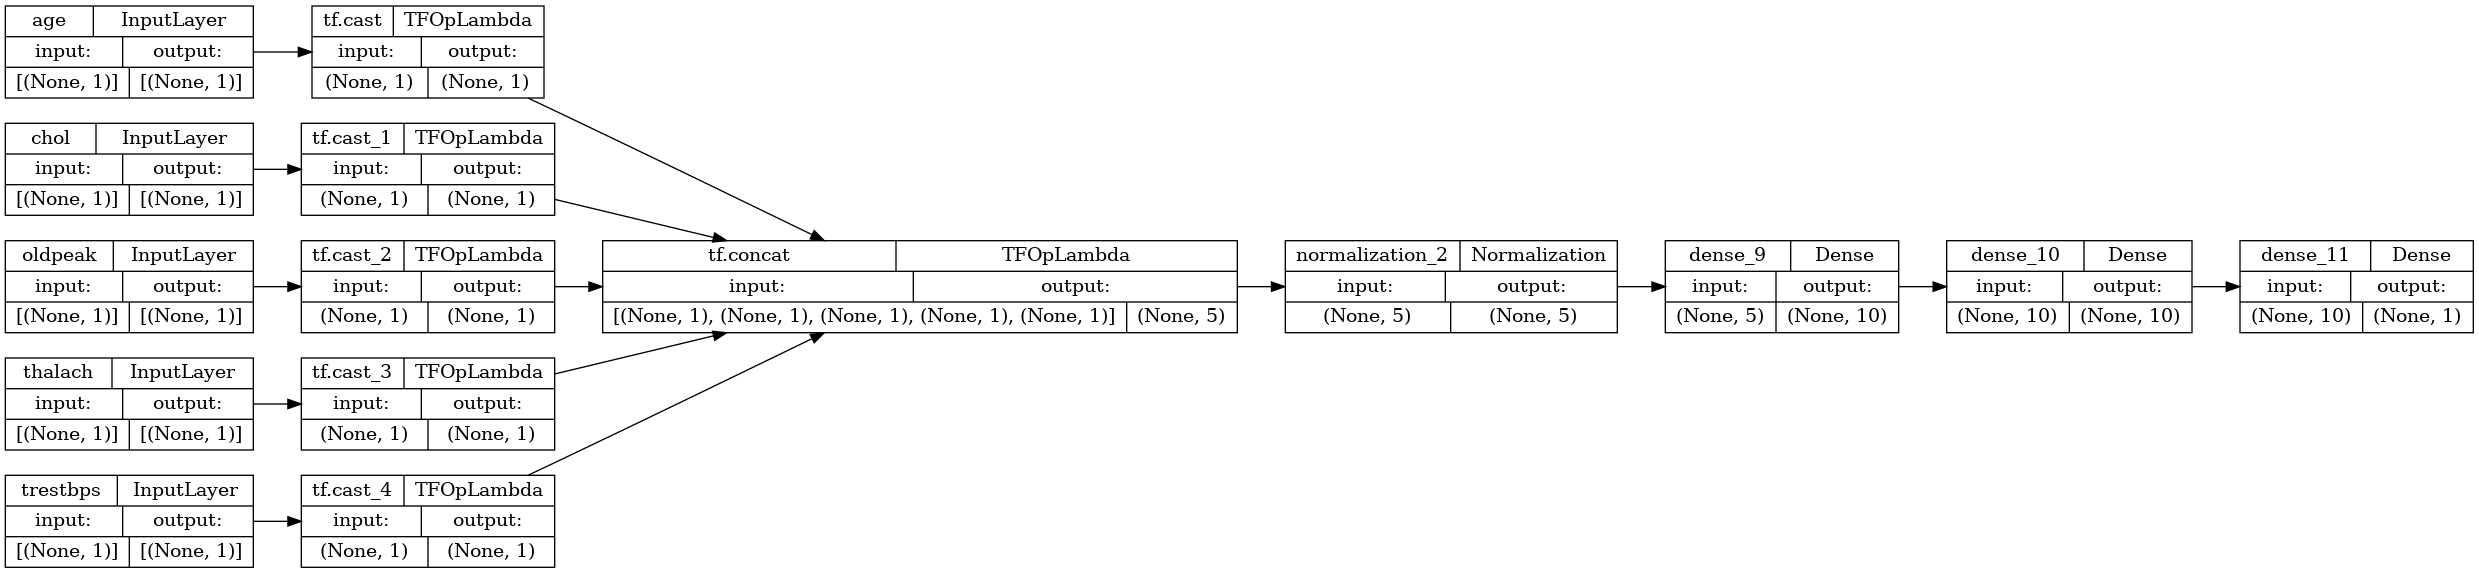

In [25]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True)

モデルサブクラスと同じ方法で関数モデルをトレーニングできます。

In [26]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 [..............................] - ETA: 1:42 - loss: 0.9221 - accuracy: 0.5000

  3/152 [..............................] - ETA: 3s - loss: 1.0653 - accuracy: 0.5000  

  6/152 [>.............................] - ETA: 3s - loss: 0.9920 - accuracy: 0.5000

  9/152 [>.............................] - ETA: 3s - loss: 1.0372 - accuracy: 0.5000

 12/152 [=>............................] - ETA: 3s - loss: 0.9778 - accuracy: 0.4583

 15/152 [=>............................] - ETA: 3s - loss: 0.9349 - accuracy: 0.5000

 18/152 [==>...........................] - ETA: 3s - loss: 0.9611 - accuracy: 0.4167

 21/152 [===>..........................] - ETA: 3s - loss: 0.9637 - accuracy: 0.3571

 24/152 [===>..........................] - ETA: 3s - loss: 0.9750 - accuracy: 0.3750

 27/152 [====>.........................] - ETA: 2s - loss: 0.9664 - accuracy: 0.3889

 30/152 [====>.........................] - ETA: 2s - loss: 0.9539 - accuracy: 0.4167

 33/152 [=====>........................] - ETA: 2s - loss: 0.9502 - accuracy: 0.4242

 36/152 [======>.......................] - ETA: 2s - loss: 0.9420 - accuracy: 0.4306

 39/152 [======>.......................] - ETA: 2s - loss: 0.9223 - accuracy: 0.4103

 42/152 [=======>......................] - ETA: 2s - loss: 0.9150 - accuracy: 0.4167

 45/152 [=======>......................] - ETA: 2s - loss: 0.9162 - accuracy: 0.4000

 48/152 [========>.....................] - ETA: 2s - loss: 0.9130 - accuracy: 0.4062

 51/152 [=========>....................] - ETA: 2s - loss: 0.9116 - accuracy: 0.4216

 54/152 [=========>....................] - ETA: 2s - loss: 0.9120 - accuracy: 0.4352

 57/152 [==========>...................] - ETA: 2s - loss: 0.9020 - accuracy: 0.4474

 60/152 [==========>...................] - ETA: 2s - loss: 0.8969 - accuracy: 0.4750

 63/152 [===========>..................] - ETA: 2s - loss: 0.8914 - accuracy: 0.4841

 66/152 [============>.................] - ETA: 1s - loss: 0.8865 - accuracy: 0.4924

 69/152 [============>.................] - ETA: 1s - loss: 0.8826 - accuracy: 0.4928

 72/152 [=============>................] - ETA: 1s - loss: 0.8810 - accuracy: 0.5000

 75/152 [=============>................] - ETA: 1s - loss: 0.8752 - accuracy: 0.5067

 78/152 [==============>...............] - ETA: 1s - loss: 0.8729 - accuracy: 0.5128

 81/152 [==============>...............] - ETA: 1s - loss: 0.8695 - accuracy: 0.5185

 84/152 [===============>..............] - ETA: 1s - loss: 0.8661 - accuracy: 0.5298

 87/152 [================>.............] - ETA: 1s - loss: 0.8607 - accuracy: 0.5402

 90/152 [================>.............] - ETA: 1s - loss: 0.8605 - accuracy: 0.5389

 93/152 [=================>............] - ETA: 1s - loss: 0.8548 - accuracy: 0.5484

 96/152 [=================>............] - ETA: 1s - loss: 0.8511 - accuracy: 0.5521

 99/152 [==================>...........] - ETA: 1s - loss: 0.8476 - accuracy: 0.5556

102/152 [===================>..........] - ETA: 1s - loss: 0.8449 - accuracy: 0.5539

105/152 [===================>..........] - ETA: 1s - loss: 0.8416 - accuracy: 0.5524

108/152 [====================>.........] - ETA: 1s - loss: 0.8355 - accuracy: 0.5602

111/152 [====================>.........] - ETA: 0s - loss: 0.8338 - accuracy: 0.5676

114/152 [=====================>........] - ETA: 0s - loss: 0.8294 - accuracy: 0.5746

117/152 [======================>.......] - ETA: 0s - loss: 0.8273 - accuracy: 0.5812

120/152 [======================>.......] - ETA: 0s - loss: 0.8247 - accuracy: 0.5792

123/152 [=======================>......] - ETA: 0s - loss: 0.8228 - accuracy: 0.5772

126/152 [=======================>......] - ETA: 0s - loss: 0.8217 - accuracy: 0.5754

129/152 [========================>.....] - ETA: 0s - loss: 0.8181 - accuracy: 0.5814

132/152 [=========================>....] - ETA: 0s - loss: 0.8128 - accuracy: 0.5871

135/152 [=========================>....] - ETA: 0s - loss: 0.8097 - accuracy: 0.5963

138/152 [==========================>...] - ETA: 0s - loss: 0.8059 - accuracy: 0.5978

141/152 [==========================>...] - ETA: 0s - loss: 0.8018 - accuracy: 0.5993

144/152 [===========================>..] - ETA: 0s - loss: 0.8005 - accuracy: 0.6042

147/152 [============================>.] - ETA: 0s - loss: 0.7976 - accuracy: 0.6054

150/152 [============================>.] - ETA: 0s - loss: 0.7967 - accuracy: 0.6033

152/152 [==============================] - 4s 23ms/step - loss: 0.7955 - accuracy: 0.6073


Epoch 2/5


  1/152 [..............................] - ETA: 3s - loss: 0.6493 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.7018 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.6966 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.7112 - accuracy: 0.7000

 13/152 [=>............................] - ETA: 3s - loss: 0.7192 - accuracy: 0.6538

 16/152 [==>...........................] - ETA: 3s - loss: 0.7096 - accuracy: 0.6562

 19/152 [==>...........................] - ETA: 2s - loss: 0.7045 - accuracy: 0.6842

 22/152 [===>..........................] - ETA: 2s - loss: 0.7019 - accuracy: 0.6818

 25/152 [===>..........................] - ETA: 2s - loss: 0.6955 - accuracy: 0.7200

 28/152 [====>.........................] - ETA: 2s - loss: 0.6908 - accuracy: 0.7321

 31/152 [=====>........................] - ETA: 2s - loss: 0.6896 - accuracy: 0.7258

 34/152 [=====>........................] - ETA: 2s - loss: 0.6869 - accuracy: 0.7500

 37/152 [======>.......................] - ETA: 2s - loss: 0.6852 - accuracy: 0.7568

 40/152 [======>.......................] - ETA: 2s - loss: 0.6854 - accuracy: 0.7500

 43/152 [=======>......................] - ETA: 2s - loss: 0.6823 - accuracy: 0.7558

 46/152 [========>.....................] - ETA: 2s - loss: 0.6805 - accuracy: 0.7609

 49/152 [========>.....................] - ETA: 2s - loss: 0.6754 - accuracy: 0.7755

 52/152 [=========>....................] - ETA: 2s - loss: 0.6754 - accuracy: 0.7788

 55/152 [=========>....................] - ETA: 2s - loss: 0.6742 - accuracy: 0.7727

 58/152 [==========>...................] - ETA: 2s - loss: 0.6788 - accuracy: 0.7586

 61/152 [===========>..................] - ETA: 2s - loss: 0.6753 - accuracy: 0.7705

 64/152 [===========>..................] - ETA: 1s - loss: 0.6745 - accuracy: 0.7656

 67/152 [============>.................] - ETA: 1s - loss: 0.6719 - accuracy: 0.7537

 70/152 [============>.................] - ETA: 1s - loss: 0.6762 - accuracy: 0.7429

 73/152 [=============>................] - ETA: 1s - loss: 0.6734 - accuracy: 0.7466

 76/152 [==============>...............] - ETA: 1s - loss: 0.6705 - accuracy: 0.7566

 79/152 [==============>...............] - ETA: 1s - loss: 0.6693 - accuracy: 0.7532

 82/152 [===============>..............] - ETA: 1s - loss: 0.6683 - accuracy: 0.7500

 85/152 [===============>..............] - ETA: 1s - loss: 0.6680 - accuracy: 0.7412

 88/152 [================>.............] - ETA: 1s - loss: 0.6685 - accuracy: 0.7386

 91/152 [================>.............] - ETA: 1s - loss: 0.6666 - accuracy: 0.7473

 94/152 [=================>............] - ETA: 1s - loss: 0.6674 - accuracy: 0.7394

 97/152 [==================>...........] - ETA: 1s - loss: 0.6667 - accuracy: 0.7320

100/152 [==================>...........] - ETA: 1s - loss: 0.6661 - accuracy: 0.7350

103/152 [===================>..........] - ETA: 1s - loss: 0.6632 - accuracy: 0.7330

106/152 [===================>..........] - ETA: 1s - loss: 0.6616 - accuracy: 0.7358

109/152 [====================>.........] - ETA: 0s - loss: 0.6595 - accuracy: 0.7385

112/152 [=====================>........] - ETA: 0s - loss: 0.6602 - accuracy: 0.7455

115/152 [=====================>........] - ETA: 0s - loss: 0.6608 - accuracy: 0.7391

118/152 [======================>.......] - ETA: 0s - loss: 0.6594 - accuracy: 0.7373

121/152 [======================>.......] - ETA: 0s - loss: 0.6601 - accuracy: 0.7355

124/152 [=======================>......] - ETA: 0s - loss: 0.6577 - accuracy: 0.7419

127/152 [========================>.....] - ETA: 0s - loss: 0.6557 - accuracy: 0.7441

130/152 [========================>.....] - ETA: 0s - loss: 0.6557 - accuracy: 0.7423

133/152 [=========================>....] - ETA: 0s - loss: 0.6555 - accuracy: 0.7406

136/152 [=========================>....] - ETA: 0s - loss: 0.6541 - accuracy: 0.7426

139/152 [==========================>...] - ETA: 0s - loss: 0.6544 - accuracy: 0.7374

142/152 [===========================>..] - ETA: 0s - loss: 0.6551 - accuracy: 0.7359

145/152 [===========================>..] - ETA: 0s - loss: 0.6539 - accuracy: 0.7345

148/152 [============================>.] - ETA: 0s - loss: 0.6536 - accuracy: 0.7297

151/152 [============================>.] - ETA: 0s - loss: 0.6512 - accuracy: 0.7351

152/152 [==============================] - 3s 22ms/step - loss: 0.6508 - accuracy: 0.7360


Epoch 3/5


  1/152 [..............................] - ETA: 3s - loss: 0.5543 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.6590 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.6212 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.6387 - accuracy: 0.7000

 13/152 [=>............................] - ETA: 3s - loss: 0.6342 - accuracy: 0.6923

 16/152 [==>...........................] - ETA: 3s - loss: 0.6376 - accuracy: 0.6875

 19/152 [==>...........................] - ETA: 3s - loss: 0.6211 - accuracy: 0.7105

 22/152 [===>..........................] - ETA: 2s - loss: 0.6205 - accuracy: 0.7045

 25/152 [===>..........................] - ETA: 2s - loss: 0.6190 - accuracy: 0.7000

 28/152 [====>.........................] - ETA: 2s - loss: 0.6190 - accuracy: 0.6607

 31/152 [=====>........................] - ETA: 2s - loss: 0.6192 - accuracy: 0.6452

 34/152 [=====>........................] - ETA: 2s - loss: 0.6261 - accuracy: 0.6471

 37/152 [======>.......................] - ETA: 2s - loss: 0.6162 - accuracy: 0.6757

 40/152 [======>.......................] - ETA: 2s - loss: 0.6114 - accuracy: 0.6875

 43/152 [=======>......................] - ETA: 2s - loss: 0.6032 - accuracy: 0.6977

 46/152 [========>.....................] - ETA: 2s - loss: 0.5976 - accuracy: 0.7065

 49/152 [========>.....................] - ETA: 2s - loss: 0.5975 - accuracy: 0.7041

 52/152 [=========>....................] - ETA: 2s - loss: 0.5936 - accuracy: 0.7115

 55/152 [=========>....................] - ETA: 2s - loss: 0.5931 - accuracy: 0.7091

 58/152 [==========>...................] - ETA: 2s - loss: 0.5900 - accuracy: 0.7155

 61/152 [===========>..................] - ETA: 2s - loss: 0.5884 - accuracy: 0.7213

 64/152 [===========>..................] - ETA: 1s - loss: 0.5880 - accuracy: 0.7266

 67/152 [============>.................] - ETA: 1s - loss: 0.5874 - accuracy: 0.7313

 70/152 [============>.................] - ETA: 1s - loss: 0.5847 - accuracy: 0.7357

 73/152 [=============>................] - ETA: 1s - loss: 0.5827 - accuracy: 0.7397

 76/152 [==============>...............] - ETA: 1s - loss: 0.5840 - accuracy: 0.7368

 79/152 [==============>...............] - ETA: 1s - loss: 0.5824 - accuracy: 0.7468

 82/152 [===============>..............] - ETA: 1s - loss: 0.5821 - accuracy: 0.7439

 85/152 [===============>..............] - ETA: 1s - loss: 0.5854 - accuracy: 0.7353

 88/152 [================>.............] - ETA: 1s - loss: 0.5815 - accuracy: 0.7443

 91/152 [================>.............] - ETA: 1s - loss: 0.5811 - accuracy: 0.7418

 94/152 [=================>............] - ETA: 1s - loss: 0.5785 - accuracy: 0.7500

 97/152 [==================>...........] - ETA: 1s - loss: 0.5734 - accuracy: 0.7577

100/152 [==================>...........] - ETA: 1s - loss: 0.5755 - accuracy: 0.7550

103/152 [===================>..........] - ETA: 1s - loss: 0.5762 - accuracy: 0.7524

106/152 [===================>..........] - ETA: 1s - loss: 0.5734 - accuracy: 0.7594

109/152 [====================>.........] - ETA: 0s - loss: 0.5767 - accuracy: 0.7615

112/152 [=====================>........] - ETA: 0s - loss: 0.5783 - accuracy: 0.7545

114/152 [=====================>........] - ETA: 0s - loss: 0.5758 - accuracy: 0.7588

117/152 [======================>.......] - ETA: 0s - loss: 0.5738 - accuracy: 0.7607

120/152 [======================>.......] - ETA: 0s - loss: 0.5703 - accuracy: 0.7667

123/152 [=======================>......] - ETA: 0s - loss: 0.5686 - accuracy: 0.7683

126/152 [=======================>......] - ETA: 0s - loss: 0.5673 - accuracy: 0.7698

129/152 [========================>.....] - ETA: 0s - loss: 0.5711 - accuracy: 0.7636

132/152 [=========================>....] - ETA: 0s - loss: 0.5742 - accuracy: 0.7576

135/152 [=========================>....] - ETA: 0s - loss: 0.5742 - accuracy: 0.7556

138/152 [==========================>...] - ETA: 0s - loss: 0.5737 - accuracy: 0.7500

141/152 [==========================>...] - ETA: 0s - loss: 0.5765 - accuracy: 0.7447

144/152 [===========================>..] - ETA: 0s - loss: 0.5769 - accuracy: 0.7465

147/152 [============================>.] - ETA: 0s - loss: 0.5777 - accuracy: 0.7449

150/152 [============================>.] - ETA: 0s - loss: 0.5767 - accuracy: 0.7433

152/152 [==============================] - 3s 22ms/step - loss: 0.5798 - accuracy: 0.7360


Epoch 4/5


  1/152 [..............................] - ETA: 3s - loss: 0.7599 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.6845 - accuracy: 0.5000

  7/152 [>.............................] - ETA: 3s - loss: 0.6031 - accuracy: 0.6429

 10/152 [>.............................] - ETA: 3s - loss: 0.5933 - accuracy: 0.6500

 13/152 [=>............................] - ETA: 2s - loss: 0.5807 - accuracy: 0.6923

 16/152 [==>...........................] - ETA: 2s - loss: 0.5810 - accuracy: 0.6875

 19/152 [==>...........................] - ETA: 2s - loss: 0.5727 - accuracy: 0.7105

 22/152 [===>..........................] - ETA: 2s - loss: 0.5592 - accuracy: 0.7273

 25/152 [===>..........................] - ETA: 2s - loss: 0.5651 - accuracy: 0.7200

 28/152 [====>.........................] - ETA: 2s - loss: 0.5537 - accuracy: 0.7321

 31/152 [=====>........................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7419

 34/152 [=====>........................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7647

 37/152 [======>.......................] - ETA: 2s - loss: 0.5148 - accuracy: 0.7838

 40/152 [======>.......................] - ETA: 2s - loss: 0.5158 - accuracy: 0.7750

 43/152 [=======>......................] - ETA: 2s - loss: 0.5134 - accuracy: 0.7791

 46/152 [========>.....................] - ETA: 2s - loss: 0.5132 - accuracy: 0.7717

 49/152 [========>.....................] - ETA: 2s - loss: 0.5150 - accuracy: 0.7551

 52/152 [=========>....................] - ETA: 2s - loss: 0.5186 - accuracy: 0.7596

 55/152 [=========>....................] - ETA: 2s - loss: 0.5163 - accuracy: 0.7636

 58/152 [==========>...................] - ETA: 2s - loss: 0.5187 - accuracy: 0.7500

 61/152 [===========>..................] - ETA: 1s - loss: 0.5249 - accuracy: 0.7459

 64/152 [===========>..................] - ETA: 1s - loss: 0.5195 - accuracy: 0.7500

 67/152 [============>.................] - ETA: 1s - loss: 0.5200 - accuracy: 0.7537

 70/152 [============>.................] - ETA: 1s - loss: 0.5192 - accuracy: 0.7500

 73/152 [=============>................] - ETA: 1s - loss: 0.5173 - accuracy: 0.7466

 76/152 [==============>...............] - ETA: 1s - loss: 0.5194 - accuracy: 0.7500

 79/152 [==============>...............] - ETA: 1s - loss: 0.5188 - accuracy: 0.7468

 82/152 [===============>..............] - ETA: 1s - loss: 0.5208 - accuracy: 0.7500

 85/152 [===============>..............] - ETA: 1s - loss: 0.5170 - accuracy: 0.7588

 88/152 [================>.............] - ETA: 1s - loss: 0.5132 - accuracy: 0.7557

 91/152 [================>.............] - ETA: 1s - loss: 0.5169 - accuracy: 0.7527

 94/152 [=================>............] - ETA: 1s - loss: 0.5191 - accuracy: 0.7447

 97/152 [==================>...........] - ETA: 1s - loss: 0.5215 - accuracy: 0.7474

100/152 [==================>...........] - ETA: 1s - loss: 0.5290 - accuracy: 0.7400

103/152 [===================>..........] - ETA: 1s - loss: 0.5314 - accuracy: 0.7379

106/152 [===================>..........] - ETA: 0s - loss: 0.5270 - accuracy: 0.7406

109/152 [====================>.........] - ETA: 0s - loss: 0.5281 - accuracy: 0.7385

112/152 [=====================>........] - ETA: 0s - loss: 0.5251 - accuracy: 0.7411

115/152 [=====================>........] - ETA: 0s - loss: 0.5247 - accuracy: 0.7391

118/152 [======================>.......] - ETA: 0s - loss: 0.5239 - accuracy: 0.7373

121/152 [======================>.......] - ETA: 0s - loss: 0.5251 - accuracy: 0.7397

124/152 [=======================>......] - ETA: 0s - loss: 0.5213 - accuracy: 0.7460

127/152 [========================>.....] - ETA: 0s - loss: 0.5235 - accuracy: 0.7441

130/152 [========================>.....] - ETA: 0s - loss: 0.5269 - accuracy: 0.7423

133/152 [=========================>....] - ETA: 0s - loss: 0.5240 - accuracy: 0.7444

136/152 [=========================>....] - ETA: 0s - loss: 0.5250 - accuracy: 0.7390

139/152 [==========================>...] - ETA: 0s - loss: 0.5249 - accuracy: 0.7410

142/152 [===========================>..] - ETA: 0s - loss: 0.5242 - accuracy: 0.7430

145/152 [===========================>..] - ETA: 0s - loss: 0.5301 - accuracy: 0.7345

148/152 [============================>.] - ETA: 0s - loss: 0.5258 - accuracy: 0.7365

151/152 [============================>.] - ETA: 0s - loss: 0.5221 - accuracy: 0.7384

152/152 [==============================] - 3s 21ms/step - loss: 0.5210 - accuracy: 0.7393


Epoch 5/5


  1/152 [..............................] - ETA: 3s - loss: 0.3075 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.4070 - accuracy: 1.0000

  7/152 [>.............................] - ETA: 3s - loss: 0.4218 - accuracy: 0.9286

 10/152 [>.............................] - ETA: 3s - loss: 0.4480 - accuracy: 0.8500

 13/152 [=>............................] - ETA: 2s - loss: 0.4260 - accuracy: 0.8846

 16/152 [==>...........................] - ETA: 2s - loss: 0.4191 - accuracy: 0.8438

 19/152 [==>...........................] - ETA: 2s - loss: 0.4403 - accuracy: 0.8158

 22/152 [===>..........................] - ETA: 2s - loss: 0.4246 - accuracy: 0.8182

 25/152 [===>..........................] - ETA: 2s - loss: 0.4581 - accuracy: 0.8000

 28/152 [====>.........................] - ETA: 2s - loss: 0.4496 - accuracy: 0.8036

 31/152 [=====>........................] - ETA: 2s - loss: 0.4516 - accuracy: 0.8065

 34/152 [=====>........................] - ETA: 2s - loss: 0.4518 - accuracy: 0.8088

 37/152 [======>.......................] - ETA: 2s - loss: 0.4676 - accuracy: 0.7973

 40/152 [======>.......................] - ETA: 2s - loss: 0.4592 - accuracy: 0.8000

 43/152 [=======>......................] - ETA: 2s - loss: 0.4843 - accuracy: 0.7674

 46/152 [========>.....................] - ETA: 2s - loss: 0.4837 - accuracy: 0.7717

 49/152 [========>.....................] - ETA: 2s - loss: 0.4898 - accuracy: 0.7755

 52/152 [=========>....................] - ETA: 2s - loss: 0.4871 - accuracy: 0.7692

 55/152 [=========>....................] - ETA: 2s - loss: 0.4851 - accuracy: 0.7727

 58/152 [==========>...................] - ETA: 2s - loss: 0.4733 - accuracy: 0.7845

 61/152 [===========>..................] - ETA: 1s - loss: 0.4655 - accuracy: 0.7951

 64/152 [===========>..................] - ETA: 1s - loss: 0.4574 - accuracy: 0.7969

 67/152 [============>.................] - ETA: 1s - loss: 0.4546 - accuracy: 0.7985

 70/152 [============>.................] - ETA: 1s - loss: 0.4540 - accuracy: 0.7929

 73/152 [=============>................] - ETA: 1s - loss: 0.4549 - accuracy: 0.7945

 76/152 [==============>...............] - ETA: 1s - loss: 0.4505 - accuracy: 0.7961

 79/152 [==============>...............] - ETA: 1s - loss: 0.4548 - accuracy: 0.7911

 82/152 [===============>..............] - ETA: 1s - loss: 0.4480 - accuracy: 0.7988

 85/152 [===============>..............] - ETA: 1s - loss: 0.4469 - accuracy: 0.8000

 88/152 [================>.............] - ETA: 1s - loss: 0.4456 - accuracy: 0.8068

 91/152 [================>.............] - ETA: 1s - loss: 0.4510 - accuracy: 0.7912

 94/152 [=================>............] - ETA: 1s - loss: 0.4478 - accuracy: 0.7926

 97/152 [==================>...........] - ETA: 1s - loss: 0.4439 - accuracy: 0.7938

100/152 [==================>...........] - ETA: 1s - loss: 0.4447 - accuracy: 0.7900

103/152 [===================>..........] - ETA: 1s - loss: 0.4474 - accuracy: 0.7913

106/152 [===================>..........] - ETA: 1s - loss: 0.4449 - accuracy: 0.7925

109/152 [====================>.........] - ETA: 0s - loss: 0.4469 - accuracy: 0.7844

112/152 [=====================>........] - ETA: 0s - loss: 0.4538 - accuracy: 0.7768

115/152 [=====================>........] - ETA: 0s - loss: 0.4649 - accuracy: 0.7696

118/152 [======================>.......] - ETA: 0s - loss: 0.4722 - accuracy: 0.7669

121/152 [======================>.......] - ETA: 0s - loss: 0.4684 - accuracy: 0.7686

124/152 [=======================>......] - ETA: 0s - loss: 0.4714 - accuracy: 0.7661

127/152 [========================>.....] - ETA: 0s - loss: 0.4719 - accuracy: 0.7677

130/152 [========================>.....] - ETA: 0s - loss: 0.4783 - accuracy: 0.7615

133/152 [=========================>....] - ETA: 0s - loss: 0.4842 - accuracy: 0.7556

136/152 [=========================>....] - ETA: 0s - loss: 0.4867 - accuracy: 0.7537

139/152 [==========================>...] - ETA: 0s - loss: 0.4878 - accuracy: 0.7518

142/152 [===========================>..] - ETA: 0s - loss: 0.4823 - accuracy: 0.7570

145/152 [===========================>..] - ETA: 0s - loss: 0.4807 - accuracy: 0.7552

148/152 [============================>.] - ETA: 0s - loss: 0.4803 - accuracy: 0.7534

151/152 [============================>.] - ETA: 0s - loss: 0.4768 - accuracy: 0.7583

152/152 [==============================] - 3s 22ms/step - loss: 0.4789 - accuracy: 0.7558


In [27]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


  1/152 [..............................] - ETA: 4s - loss: 0.1405 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.4590 - accuracy: 0.6250

  7/152 [>.............................] - ETA: 3s - loss: 0.3591 - accuracy: 0.7143

 10/152 [>.............................] - ETA: 3s - loss: 0.4382 - accuracy: 0.7500

 13/152 [=>............................] - ETA: 3s - loss: 0.4066 - accuracy: 0.7308

 16/152 [==>...........................] - ETA: 3s - loss: 0.4061 - accuracy: 0.7500

 19/152 [==>...........................] - ETA: 3s - loss: 0.4259 - accuracy: 0.7632

 22/152 [===>..........................] - ETA: 2s - loss: 0.4746 - accuracy: 0.7273

 25/152 [===>..........................] - ETA: 2s - loss: 0.4986 - accuracy: 0.7000

 28/152 [====>.........................] - ETA: 2s - loss: 0.5014 - accuracy: 0.6786

 31/152 [=====>........................] - ETA: 2s - loss: 0.4758 - accuracy: 0.7097

 34/152 [=====>........................] - ETA: 2s - loss: 0.4908 - accuracy: 0.7059

 37/152 [======>.......................] - ETA: 2s - loss: 0.4791 - accuracy: 0.7297

 40/152 [======>.......................] - ETA: 2s - loss: 0.4687 - accuracy: 0.7375

 43/152 [=======>......................] - ETA: 2s - loss: 0.4632 - accuracy: 0.7442

 46/152 [========>.....................] - ETA: 2s - loss: 0.4627 - accuracy: 0.7283

 49/152 [========>.....................] - ETA: 2s - loss: 0.4540 - accuracy: 0.7449

 52/152 [=========>....................] - ETA: 2s - loss: 0.4810 - accuracy: 0.7212

 55/152 [=========>....................] - ETA: 2s - loss: 0.4835 - accuracy: 0.7364

 58/152 [==========>...................] - ETA: 2s - loss: 0.4744 - accuracy: 0.7500

 61/152 [===========>..................] - ETA: 2s - loss: 0.4823 - accuracy: 0.7377

 64/152 [===========>..................] - ETA: 2s - loss: 0.4769 - accuracy: 0.7500

 67/152 [============>.................] - ETA: 1s - loss: 0.4869 - accuracy: 0.7463

 70/152 [============>.................] - ETA: 1s - loss: 0.4789 - accuracy: 0.7500

 73/152 [=============>................] - ETA: 1s - loss: 0.4860 - accuracy: 0.7466

 76/152 [==============>...............] - ETA: 1s - loss: 0.4788 - accuracy: 0.7500

 79/152 [==============>...............] - ETA: 1s - loss: 0.4866 - accuracy: 0.7468

 82/152 [===============>..............] - ETA: 1s - loss: 0.4834 - accuracy: 0.7500

 85/152 [===============>..............] - ETA: 1s - loss: 0.4790 - accuracy: 0.7529

 88/152 [================>.............] - ETA: 1s - loss: 0.4719 - accuracy: 0.7557

 91/152 [================>.............] - ETA: 1s - loss: 0.4699 - accuracy: 0.7582

 94/152 [=================>............] - ETA: 1s - loss: 0.4729 - accuracy: 0.7553

 97/152 [==================>...........] - ETA: 1s - loss: 0.4722 - accuracy: 0.7577

100/152 [==================>...........] - ETA: 1s - loss: 0.4655 - accuracy: 0.7600

103/152 [===================>..........] - ETA: 1s - loss: 0.4654 - accuracy: 0.7573

106/152 [===================>..........] - ETA: 1s - loss: 0.4651 - accuracy: 0.7547

109/152 [====================>.........] - ETA: 0s - loss: 0.4571 - accuracy: 0.7615

112/152 [=====================>........] - ETA: 0s - loss: 0.4610 - accuracy: 0.7545

115/152 [=====================>........] - ETA: 0s - loss: 0.4699 - accuracy: 0.7435

118/152 [======================>.......] - ETA: 0s - loss: 0.4664 - accuracy: 0.7458

121/152 [======================>.......] - ETA: 0s - loss: 0.4615 - accuracy: 0.7521

123/152 [=======================>......] - ETA: 0s - loss: 0.4634 - accuracy: 0.7480

126/152 [=======================>......] - ETA: 0s - loss: 0.4628 - accuracy: 0.7500

129/152 [========================>.....] - ETA: 0s - loss: 0.4656 - accuracy: 0.7481

132/152 [=========================>....] - ETA: 0s - loss: 0.4625 - accuracy: 0.7500

135/152 [=========================>....] - ETA: 0s - loss: 0.4576 - accuracy: 0.7556

138/152 [==========================>...] - ETA: 0s - loss: 0.4545 - accuracy: 0.7609

141/152 [==========================>...] - ETA: 0s - loss: 0.4493 - accuracy: 0.7660

144/152 [===========================>..] - ETA: 0s - loss: 0.4489 - accuracy: 0.7674

147/152 [============================>.] - ETA: 0s - loss: 0.4447 - accuracy: 0.7687

150/152 [============================>.] - ETA: 0s - loss: 0.4483 - accuracy: 0.7700

152/152 [==============================] - 4s 23ms/step - loss: 0.4543 - accuracy: 0.7690


Epoch 2/5


  1/152 [..............................] - ETA: 3s - loss: 0.4109 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.4463 - accuracy: 0.7500

  7/152 [>.............................] - ETA: 3s - loss: 0.3466 - accuracy: 0.8571

 10/152 [>.............................] - ETA: 3s - loss: 0.3115 - accuracy: 0.8500

 13/152 [=>............................] - ETA: 3s - loss: 0.4032 - accuracy: 0.7692

 16/152 [==>...........................] - ETA: 3s - loss: 0.4160 - accuracy: 0.7812

 19/152 [==>...........................] - ETA: 3s - loss: 0.4011 - accuracy: 0.7895

 22/152 [===>..........................] - ETA: 3s - loss: 0.5055 - accuracy: 0.7273

 25/152 [===>..........................] - ETA: 2s - loss: 0.5035 - accuracy: 0.7200

 28/152 [====>.........................] - ETA: 2s - loss: 0.5018 - accuracy: 0.6964

 31/152 [=====>........................] - ETA: 2s - loss: 0.4778 - accuracy: 0.7097

 34/152 [=====>........................] - ETA: 2s - loss: 0.4767 - accuracy: 0.7059

 37/152 [======>.......................] - ETA: 2s - loss: 0.4850 - accuracy: 0.7027

 40/152 [======>.......................] - ETA: 2s - loss: 0.4853 - accuracy: 0.7125

 43/152 [=======>......................] - ETA: 2s - loss: 0.4613 - accuracy: 0.7326

 46/152 [========>.....................] - ETA: 2s - loss: 0.4740 - accuracy: 0.7391

 49/152 [========>.....................] - ETA: 2s - loss: 0.4674 - accuracy: 0.7551

 52/152 [=========>....................] - ETA: 2s - loss: 0.4616 - accuracy: 0.7596

 55/152 [=========>....................] - ETA: 2s - loss: 0.4753 - accuracy: 0.7545

 58/152 [==========>...................] - ETA: 2s - loss: 0.4799 - accuracy: 0.7586

 61/152 [===========>..................] - ETA: 2s - loss: 0.4653 - accuracy: 0.7623

 64/152 [===========>..................] - ETA: 2s - loss: 0.4659 - accuracy: 0.7656

 67/152 [============>.................] - ETA: 1s - loss: 0.4691 - accuracy: 0.7687

 70/152 [============>.................] - ETA: 1s - loss: 0.4558 - accuracy: 0.7786

 73/152 [=============>................] - ETA: 1s - loss: 0.4558 - accuracy: 0.7808

 76/152 [==============>...............] - ETA: 1s - loss: 0.4555 - accuracy: 0.7763

 79/152 [==============>...............] - ETA: 1s - loss: 0.4575 - accuracy: 0.7722

 82/152 [===============>..............] - ETA: 1s - loss: 0.4585 - accuracy: 0.7683

 85/152 [===============>..............] - ETA: 1s - loss: 0.4579 - accuracy: 0.7647

 88/152 [================>.............] - ETA: 1s - loss: 0.4651 - accuracy: 0.7614

 91/152 [================>.............] - ETA: 1s - loss: 0.4654 - accuracy: 0.7637

 94/152 [=================>............] - ETA: 1s - loss: 0.4613 - accuracy: 0.7660

 97/152 [==================>...........] - ETA: 1s - loss: 0.4601 - accuracy: 0.7680

100/152 [==================>...........] - ETA: 1s - loss: 0.4573 - accuracy: 0.7650

103/152 [===================>..........] - ETA: 1s - loss: 0.4507 - accuracy: 0.7718

106/152 [===================>..........] - ETA: 1s - loss: 0.4562 - accuracy: 0.7736

109/152 [====================>.........] - ETA: 0s - loss: 0.4531 - accuracy: 0.7706

112/152 [=====================>........] - ETA: 0s - loss: 0.4571 - accuracy: 0.7634

115/152 [=====================>........] - ETA: 0s - loss: 0.4532 - accuracy: 0.7696

118/152 [======================>.......] - ETA: 0s - loss: 0.4508 - accuracy: 0.7669

121/152 [======================>.......] - ETA: 0s - loss: 0.4474 - accuracy: 0.7727

124/152 [=======================>......] - ETA: 0s - loss: 0.4457 - accuracy: 0.7742

127/152 [========================>.....] - ETA: 0s - loss: 0.4438 - accuracy: 0.7756

130/152 [========================>.....] - ETA: 0s - loss: 0.4412 - accuracy: 0.7769

133/152 [=========================>....] - ETA: 0s - loss: 0.4379 - accuracy: 0.7782

136/152 [=========================>....] - ETA: 0s - loss: 0.4419 - accuracy: 0.7721

139/152 [==========================>...] - ETA: 0s - loss: 0.4366 - accuracy: 0.7770

142/152 [===========================>..] - ETA: 0s - loss: 0.4367 - accuracy: 0.7782

145/152 [===========================>..] - ETA: 0s - loss: 0.4359 - accuracy: 0.7793

148/152 [============================>.] - ETA: 0s - loss: 0.4358 - accuracy: 0.7770

151/152 [============================>.] - ETA: 0s - loss: 0.4411 - accuracy: 0.7748

152/152 [==============================] - 3s 23ms/step - loss: 0.4402 - accuracy: 0.7756


Epoch 3/5


  1/152 [..............................] - ETA: 4s - loss: 0.0924 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.2518 - accuracy: 0.8750

  7/152 [>.............................] - ETA: 3s - loss: 0.4156 - accuracy: 0.7143

 10/152 [>.............................] - ETA: 3s - loss: 0.3861 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 3s - loss: 0.3469 - accuracy: 0.8462

 16/152 [==>...........................] - ETA: 3s - loss: 0.3954 - accuracy: 0.8438

 19/152 [==>...........................] - ETA: 3s - loss: 0.3891 - accuracy: 0.8158

 22/152 [===>..........................] - ETA: 3s - loss: 0.3701 - accuracy: 0.8409

 25/152 [===>..........................] - ETA: 2s - loss: 0.3675 - accuracy: 0.8200

 28/152 [====>.........................] - ETA: 2s - loss: 0.3832 - accuracy: 0.8036

 31/152 [=====>........................] - ETA: 2s - loss: 0.3810 - accuracy: 0.8065

 34/152 [=====>........................] - ETA: 2s - loss: 0.4122 - accuracy: 0.7941

 37/152 [======>.......................] - ETA: 2s - loss: 0.4052 - accuracy: 0.8108

 40/152 [======>.......................] - ETA: 2s - loss: 0.3873 - accuracy: 0.8250

 43/152 [=======>......................] - ETA: 2s - loss: 0.3944 - accuracy: 0.8140

 46/152 [========>.....................] - ETA: 2s - loss: 0.4131 - accuracy: 0.8043

 49/152 [========>.....................] - ETA: 2s - loss: 0.4167 - accuracy: 0.8061

 52/152 [=========>....................] - ETA: 2s - loss: 0.4258 - accuracy: 0.7981

 55/152 [=========>....................] - ETA: 2s - loss: 0.4195 - accuracy: 0.8000

 58/152 [==========>...................] - ETA: 2s - loss: 0.4093 - accuracy: 0.8017

 61/152 [===========>..................] - ETA: 2s - loss: 0.4184 - accuracy: 0.7951

 64/152 [===========>..................] - ETA: 2s - loss: 0.4092 - accuracy: 0.8047

 67/152 [============>.................] - ETA: 1s - loss: 0.4120 - accuracy: 0.8060

 70/152 [============>.................] - ETA: 1s - loss: 0.4153 - accuracy: 0.8071

 73/152 [=============>................] - ETA: 1s - loss: 0.4114 - accuracy: 0.8082

 76/152 [==============>...............] - ETA: 1s - loss: 0.4204 - accuracy: 0.8026

 79/152 [==============>...............] - ETA: 1s - loss: 0.4357 - accuracy: 0.7911

 82/152 [===============>..............] - ETA: 1s - loss: 0.4328 - accuracy: 0.7866

 85/152 [===============>..............] - ETA: 1s - loss: 0.4296 - accuracy: 0.7941

 88/152 [================>.............] - ETA: 1s - loss: 0.4217 - accuracy: 0.8011

 91/152 [================>.............] - ETA: 1s - loss: 0.4143 - accuracy: 0.8077

 94/152 [=================>............] - ETA: 1s - loss: 0.4305 - accuracy: 0.7926

 97/152 [==================>...........] - ETA: 1s - loss: 0.4230 - accuracy: 0.7990

100/152 [==================>...........] - ETA: 1s - loss: 0.4158 - accuracy: 0.8000

103/152 [===================>..........] - ETA: 1s - loss: 0.4132 - accuracy: 0.8010

106/152 [===================>..........] - ETA: 1s - loss: 0.4116 - accuracy: 0.7972

109/152 [====================>.........] - ETA: 1s - loss: 0.4202 - accuracy: 0.7890

112/152 [=====================>........] - ETA: 0s - loss: 0.4244 - accuracy: 0.7812

115/152 [=====================>........] - ETA: 0s - loss: 0.4175 - accuracy: 0.7870

118/152 [======================>.......] - ETA: 0s - loss: 0.4181 - accuracy: 0.7797

121/152 [======================>.......] - ETA: 0s - loss: 0.4251 - accuracy: 0.7769

124/152 [=======================>......] - ETA: 0s - loss: 0.4276 - accuracy: 0.7742

127/152 [========================>.....] - ETA: 0s - loss: 0.4259 - accuracy: 0.7756

130/152 [========================>.....] - ETA: 0s - loss: 0.4254 - accuracy: 0.7769

133/152 [=========================>....] - ETA: 0s - loss: 0.4257 - accuracy: 0.7782

136/152 [=========================>....] - ETA: 0s - loss: 0.4232 - accuracy: 0.7757

139/152 [==========================>...] - ETA: 0s - loss: 0.4287 - accuracy: 0.7734

142/152 [===========================>..] - ETA: 0s - loss: 0.4314 - accuracy: 0.7711

145/152 [===========================>..] - ETA: 0s - loss: 0.4382 - accuracy: 0.7655

148/152 [============================>.] - ETA: 0s - loss: 0.4338 - accuracy: 0.7703

151/152 [============================>.] - ETA: 0s - loss: 0.4326 - accuracy: 0.7715

152/152 [==============================] - 4s 23ms/step - loss: 0.4313 - accuracy: 0.7723


Epoch 4/5


  1/152 [..............................] - ETA: 3s - loss: 0.9632 - accuracy: 0.5000

  4/152 [..............................] - ETA: 3s - loss: 0.5704 - accuracy: 0.6250

  7/152 [>.............................] - ETA: 3s - loss: 0.4229 - accuracy: 0.7857

 10/152 [>.............................] - ETA: 3s - loss: 0.5140 - accuracy: 0.7500

 13/152 [=>............................] - ETA: 3s - loss: 0.4682 - accuracy: 0.7692

 16/152 [==>...........................] - ETA: 3s - loss: 0.4168 - accuracy: 0.7812

 19/152 [==>...........................] - ETA: 2s - loss: 0.4377 - accuracy: 0.7632

 22/152 [===>..........................] - ETA: 2s - loss: 0.4004 - accuracy: 0.7955

 25/152 [===>..........................] - ETA: 2s - loss: 0.4058 - accuracy: 0.8000

 28/152 [====>.........................] - ETA: 2s - loss: 0.3875 - accuracy: 0.8036

 31/152 [=====>........................] - ETA: 2s - loss: 0.4507 - accuracy: 0.7581

 34/152 [=====>........................] - ETA: 2s - loss: 0.4378 - accuracy: 0.7794

 37/152 [======>.......................] - ETA: 2s - loss: 0.4341 - accuracy: 0.7703

 40/152 [======>.......................] - ETA: 2s - loss: 0.4355 - accuracy: 0.7625

 43/152 [=======>......................] - ETA: 2s - loss: 0.4235 - accuracy: 0.7674

 46/152 [========>.....................] - ETA: 2s - loss: 0.4206 - accuracy: 0.7717

 49/152 [========>.....................] - ETA: 2s - loss: 0.4113 - accuracy: 0.7755

 52/152 [=========>....................] - ETA: 2s - loss: 0.4314 - accuracy: 0.7596

 55/152 [=========>....................] - ETA: 2s - loss: 0.4218 - accuracy: 0.7636

 58/152 [==========>...................] - ETA: 2s - loss: 0.4288 - accuracy: 0.7586

 61/152 [===========>..................] - ETA: 2s - loss: 0.4275 - accuracy: 0.7541

 64/152 [===========>..................] - ETA: 2s - loss: 0.4391 - accuracy: 0.7344

 67/152 [============>.................] - ETA: 1s - loss: 0.4283 - accuracy: 0.7388

 70/152 [============>.................] - ETA: 1s - loss: 0.4375 - accuracy: 0.7429

 73/152 [=============>................] - ETA: 1s - loss: 0.4347 - accuracy: 0.7466

 76/152 [==============>...............] - ETA: 1s - loss: 0.4269 - accuracy: 0.7500

 79/152 [==============>...............] - ETA: 1s - loss: 0.4310 - accuracy: 0.7532

 81/152 [==============>...............] - ETA: 1s - loss: 0.4279 - accuracy: 0.7593

 83/152 [===============>..............] - ETA: 1s - loss: 0.4301 - accuracy: 0.7590

 86/152 [===============>..............] - ETA: 1s - loss: 0.4291 - accuracy: 0.7616

 88/152 [================>.............] - ETA: 1s - loss: 0.4311 - accuracy: 0.7500

 91/152 [================>.............] - ETA: 1s - loss: 0.4373 - accuracy: 0.7527

 94/152 [=================>............] - ETA: 1s - loss: 0.4374 - accuracy: 0.7553

 97/152 [==================>...........] - ETA: 1s - loss: 0.4313 - accuracy: 0.7629

100/152 [==================>...........] - ETA: 1s - loss: 0.4347 - accuracy: 0.7600

103/152 [===================>..........] - ETA: 1s - loss: 0.4238 - accuracy: 0.7670

106/152 [===================>..........] - ETA: 1s - loss: 0.4198 - accuracy: 0.7689

109/152 [====================>.........] - ETA: 1s - loss: 0.4133 - accuracy: 0.7706

112/152 [=====================>........] - ETA: 0s - loss: 0.4089 - accuracy: 0.7723

115/152 [=====================>........] - ETA: 0s - loss: 0.4183 - accuracy: 0.7696

118/152 [======================>.......] - ETA: 0s - loss: 0.4129 - accuracy: 0.7754

121/152 [======================>.......] - ETA: 0s - loss: 0.4152 - accuracy: 0.7769

124/152 [=======================>......] - ETA: 0s - loss: 0.4130 - accuracy: 0.7782

127/152 [========================>.....] - ETA: 0s - loss: 0.4280 - accuracy: 0.7717

130/152 [========================>.....] - ETA: 0s - loss: 0.4315 - accuracy: 0.7731

133/152 [=========================>....] - ETA: 0s - loss: 0.4265 - accuracy: 0.7782

136/152 [=========================>....] - ETA: 0s - loss: 0.4237 - accuracy: 0.7757

139/152 [==========================>...] - ETA: 0s - loss: 0.4310 - accuracy: 0.7698

142/152 [===========================>..] - ETA: 0s - loss: 0.4302 - accuracy: 0.7711

145/152 [===========================>..] - ETA: 0s - loss: 0.4252 - accuracy: 0.7759

148/152 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7736

151/152 [============================>.] - ETA: 0s - loss: 0.4273 - accuracy: 0.7781

152/152 [==============================] - 4s 23ms/step - loss: 0.4265 - accuracy: 0.7789


Epoch 5/5


  1/152 [..............................] - ETA: 3s - loss: 0.0718 - accuracy: 1.0000

  4/152 [..............................] - ETA: 3s - loss: 0.2754 - accuracy: 0.8750

  7/152 [>.............................] - ETA: 3s - loss: 0.2412 - accuracy: 0.9286

 10/152 [>.............................] - ETA: 3s - loss: 0.3432 - accuracy: 0.8000

 13/152 [=>............................] - ETA: 3s - loss: 0.3177 - accuracy: 0.8077

 16/152 [==>...........................] - ETA: 3s - loss: 0.2968 - accuracy: 0.8438

 19/152 [==>...........................] - ETA: 3s - loss: 0.3088 - accuracy: 0.8421

 22/152 [===>..........................] - ETA: 2s - loss: 0.3175 - accuracy: 0.8409

 25/152 [===>..........................] - ETA: 2s - loss: 0.2988 - accuracy: 0.8600

 28/152 [====>.........................] - ETA: 2s - loss: 0.3532 - accuracy: 0.8393

 31/152 [=====>........................] - ETA: 2s - loss: 0.3647 - accuracy: 0.8226

 34/152 [=====>........................] - ETA: 2s - loss: 0.3465 - accuracy: 0.8382

 37/152 [======>.......................] - ETA: 2s - loss: 0.3401 - accuracy: 0.8514

 40/152 [======>.......................] - ETA: 2s - loss: 0.3474 - accuracy: 0.8375

 43/152 [=======>......................] - ETA: 2s - loss: 0.3717 - accuracy: 0.8023

 46/152 [========>.....................] - ETA: 2s - loss: 0.3790 - accuracy: 0.7826

 49/152 [========>.....................] - ETA: 2s - loss: 0.3767 - accuracy: 0.7959

 52/152 [=========>....................] - ETA: 2s - loss: 0.3820 - accuracy: 0.7981

 55/152 [=========>....................] - ETA: 2s - loss: 0.3975 - accuracy: 0.7909

 58/152 [==========>...................] - ETA: 2s - loss: 0.3866 - accuracy: 0.7931

 61/152 [===========>..................] - ETA: 2s - loss: 0.3974 - accuracy: 0.7951

 64/152 [===========>..................] - ETA: 2s - loss: 0.3942 - accuracy: 0.7969

 67/152 [============>.................] - ETA: 1s - loss: 0.3839 - accuracy: 0.7985

 70/152 [============>.................] - ETA: 1s - loss: 0.3936 - accuracy: 0.7857

 73/152 [=============>................] - ETA: 1s - loss: 0.3999 - accuracy: 0.7808

 76/152 [==============>...............] - ETA: 1s - loss: 0.4038 - accuracy: 0.7829

 79/152 [==============>...............] - ETA: 1s - loss: 0.4020 - accuracy: 0.7848

 82/152 [===============>..............] - ETA: 1s - loss: 0.4080 - accuracy: 0.7683

 85/152 [===============>..............] - ETA: 1s - loss: 0.4088 - accuracy: 0.7765

 88/152 [================>.............] - ETA: 1s - loss: 0.4259 - accuracy: 0.7670

 91/152 [================>.............] - ETA: 1s - loss: 0.4187 - accuracy: 0.7747

 94/152 [=================>............] - ETA: 1s - loss: 0.4094 - accuracy: 0.7819

 97/152 [==================>...........] - ETA: 1s - loss: 0.4058 - accuracy: 0.7887

100/152 [==================>...........] - ETA: 1s - loss: 0.4068 - accuracy: 0.7900

103/152 [===================>..........] - ETA: 1s - loss: 0.4052 - accuracy: 0.7913

106/152 [===================>..........] - ETA: 1s - loss: 0.4060 - accuracy: 0.7877

109/152 [====================>.........] - ETA: 0s - loss: 0.4190 - accuracy: 0.7798

112/152 [=====================>........] - ETA: 0s - loss: 0.4166 - accuracy: 0.7768

115/152 [=====================>........] - ETA: 0s - loss: 0.4158 - accuracy: 0.7783

118/152 [======================>.......] - ETA: 0s - loss: 0.4240 - accuracy: 0.7754

121/152 [======================>.......] - ETA: 0s - loss: 0.4181 - accuracy: 0.7810

124/152 [=======================>......] - ETA: 0s - loss: 0.4201 - accuracy: 0.7782

127/152 [========================>.....] - ETA: 0s - loss: 0.4181 - accuracy: 0.7795

130/152 [========================>.....] - ETA: 0s - loss: 0.4122 - accuracy: 0.7846

133/152 [=========================>....] - ETA: 0s - loss: 0.4126 - accuracy: 0.7857

136/152 [=========================>....] - ETA: 0s - loss: 0.4137 - accuracy: 0.7831

139/152 [==========================>...] - ETA: 0s - loss: 0.4089 - accuracy: 0.7878

142/152 [===========================>..] - ETA: 0s - loss: 0.4170 - accuracy: 0.7852

145/152 [===========================>..] - ETA: 0s - loss: 0.4183 - accuracy: 0.7862

148/152 [============================>.] - ETA: 0s - loss: 0.4168 - accuracy: 0.7872

151/152 [============================>.] - ETA: 0s - loss: 0.4227 - accuracy: 0.7815

152/152 [==============================] - 3s 23ms/step - loss: 0.4217 - accuracy: 0.7822


## 完全なサンプル

異なる型の <code>DataFrame</code> を Keras に渡す場合、各列に対して固有の前処理が必要になる場合があります。この前処理は DataFrame で直接行うことができますが、モデルが正しく機能するためには、入力を常に同じ方法で前処理する必要があります。したがって、最善のアプローチは、前処理をモデルに組み込むことです。<a>Keras 前処理レイヤー</a>は多くの一般的なタスクをカバーしています。

### 前処理ヘッドを構築する

このデータセットでは、生データの「整数」特徴量の一部は実際にはカテゴリインデックスです。これらのインデックスは実際には順序付けられた数値ではありません (詳細については、<a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">データセットの説明</a>を参照してください)。これらは順序付けされていないため、モデルに直接フィードするのは不適切です。モデルはそれらを順序付けされたものとして解釈するからです。これらの入力を使用するには、ワンホットベクトルまたは埋め込みベクトルとしてエンコードする必要があります。文字列カテゴリカル特徴量でも同じです。

注意: 同一の前処理を必要とする多くの特徴量がある場合は、前処理を適用する前にそれらを連結すると効率的です。

一方、バイナリ特徴量は、通常、エンコードまたは正規化する必要はありません。

各グループに分類される特徴量のリストを作成することから始めます。

In [28]:
binary_feature_names = ['sex', 'fbs', 'exang']

In [29]:
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']

次に、各入力に適切な前処理を適用し、結果を連結する前処理モデルを構築します。

このセクションでは、[Keras Functional API](https://www.tensorflow.org/guide/keras/functional) を使用して前処理を実装します。まず、データフレームの列ごとに 1 つの `tf.keras.Input` を作成します。

In [30]:
inputs = {}
for name, column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

In [31]:
inputs

{'age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'age')>,
 'sex': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'sex')>,
 'cp': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'cp')>,
 'trestbps': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'chol')>,
 'fbs': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'fbs')>,
 'restecg': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'restecg')>,
 'thalach': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'thalach')>,
 'exang': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'exang')>,
 'oldpeak': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'oldpeak')>,
 'slope': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'slope')>,
 'ca': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'ca')>,
 'thal': <KerasTensor: shape=(None,) dtype=string 

入力ごとに、Keras レイヤーと TensorFlow 演算を使用していくつかの変換を適用します。各特徴量は、スカラーのバッチとして開始されます (`shape=(batch,)`)。それぞれの出力は、`tf.float32` ベクトルのバッチ (`shape=(batch, n)`) である必要があります。最後のステップでは、これらすべてのベクトルを連結します。


#### バイナリ入力

バイナリ入力は前処理を必要としないため、ベクトル軸を追加し、`float32` にキャストして、前処理された入力のリストに追加します。

In [32]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  inp = inp[:, tf.newaxis]
  float_value = tf.cast(inp, tf.float32)
  preprocessed.append(float_value)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>]

#### 数値入力

前のセクションと同様に、これらの数値入力は、使用する前に `tf.keras.layers.Normalization` レイヤーを介して実行する必要があります。違いは、ここでは dict として入力されることです。以下のコードは、DataFrame から数値の特徴量を収集し、それらをスタックし、`Normalization.adapt` メソッドに渡します。

In [33]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

以下のコードは、数値特徴量をスタックし、それらを正規化レイヤーで実行します。

In [34]:
numeric_inputs = {}
for name in numeric_feature_names:
  numeric_inputs[name]=inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_3')>]

#### カテゴリカル特徴量

カテゴリカル特徴量を使用するには、最初にそれらをバイナリベクトルまたは埋め込みのいずれかにエンコードする必要があります。これらの特徴量には少数のカテゴリしか含まれていないため、`tf.keras.layers.StringLookup` および  `tf.keras.layers.IntegerLookup` レイヤーの両方でサポートされている `output_mode='one_hot'` オプションを使用して、入力をワンホットベクトルに直接変換します。

次に、これらのレイヤーがどのように機能するかの例を示します。

In [35]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [36]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

各入力の語彙を決定するには、その語彙をワンホットベクトルに変換するレイヤーを作成します。

In [37]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name][:, tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



#### 前処理ヘッドを組み立てる

この時点で、`preprocessed` はすべての前処理結果の Python リストであり、各結果は `(batch_size, depth)` の形状をしています。

In [38]:
preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_5')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_6')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_7')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_3')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'integer_lookup_1')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_2')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_3')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'string_lookup_1')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'integer_lookup_4')>]

前処理されたすべての特徴量を `depth` 軸に沿って連結し、各ディクショナリのサンプルを単一のベクトルに変換します。ベクトルには、カテゴリカル特徴量、数値特徴量、およびカテゴリワンホット特徴量が含まれています。

In [39]:
preprocesssed_result = tf.concat(preprocessed, axis=-1)
preprocesssed_result

<KerasTensor: shape=(None, 33) dtype=float32 (created by layer 'tf.concat_1')>

次に、その計算からモデルを作成して、再利用できるようにします。

In [40]:
preprocessor = tf.keras.Model(inputs, preprocesssed_result)

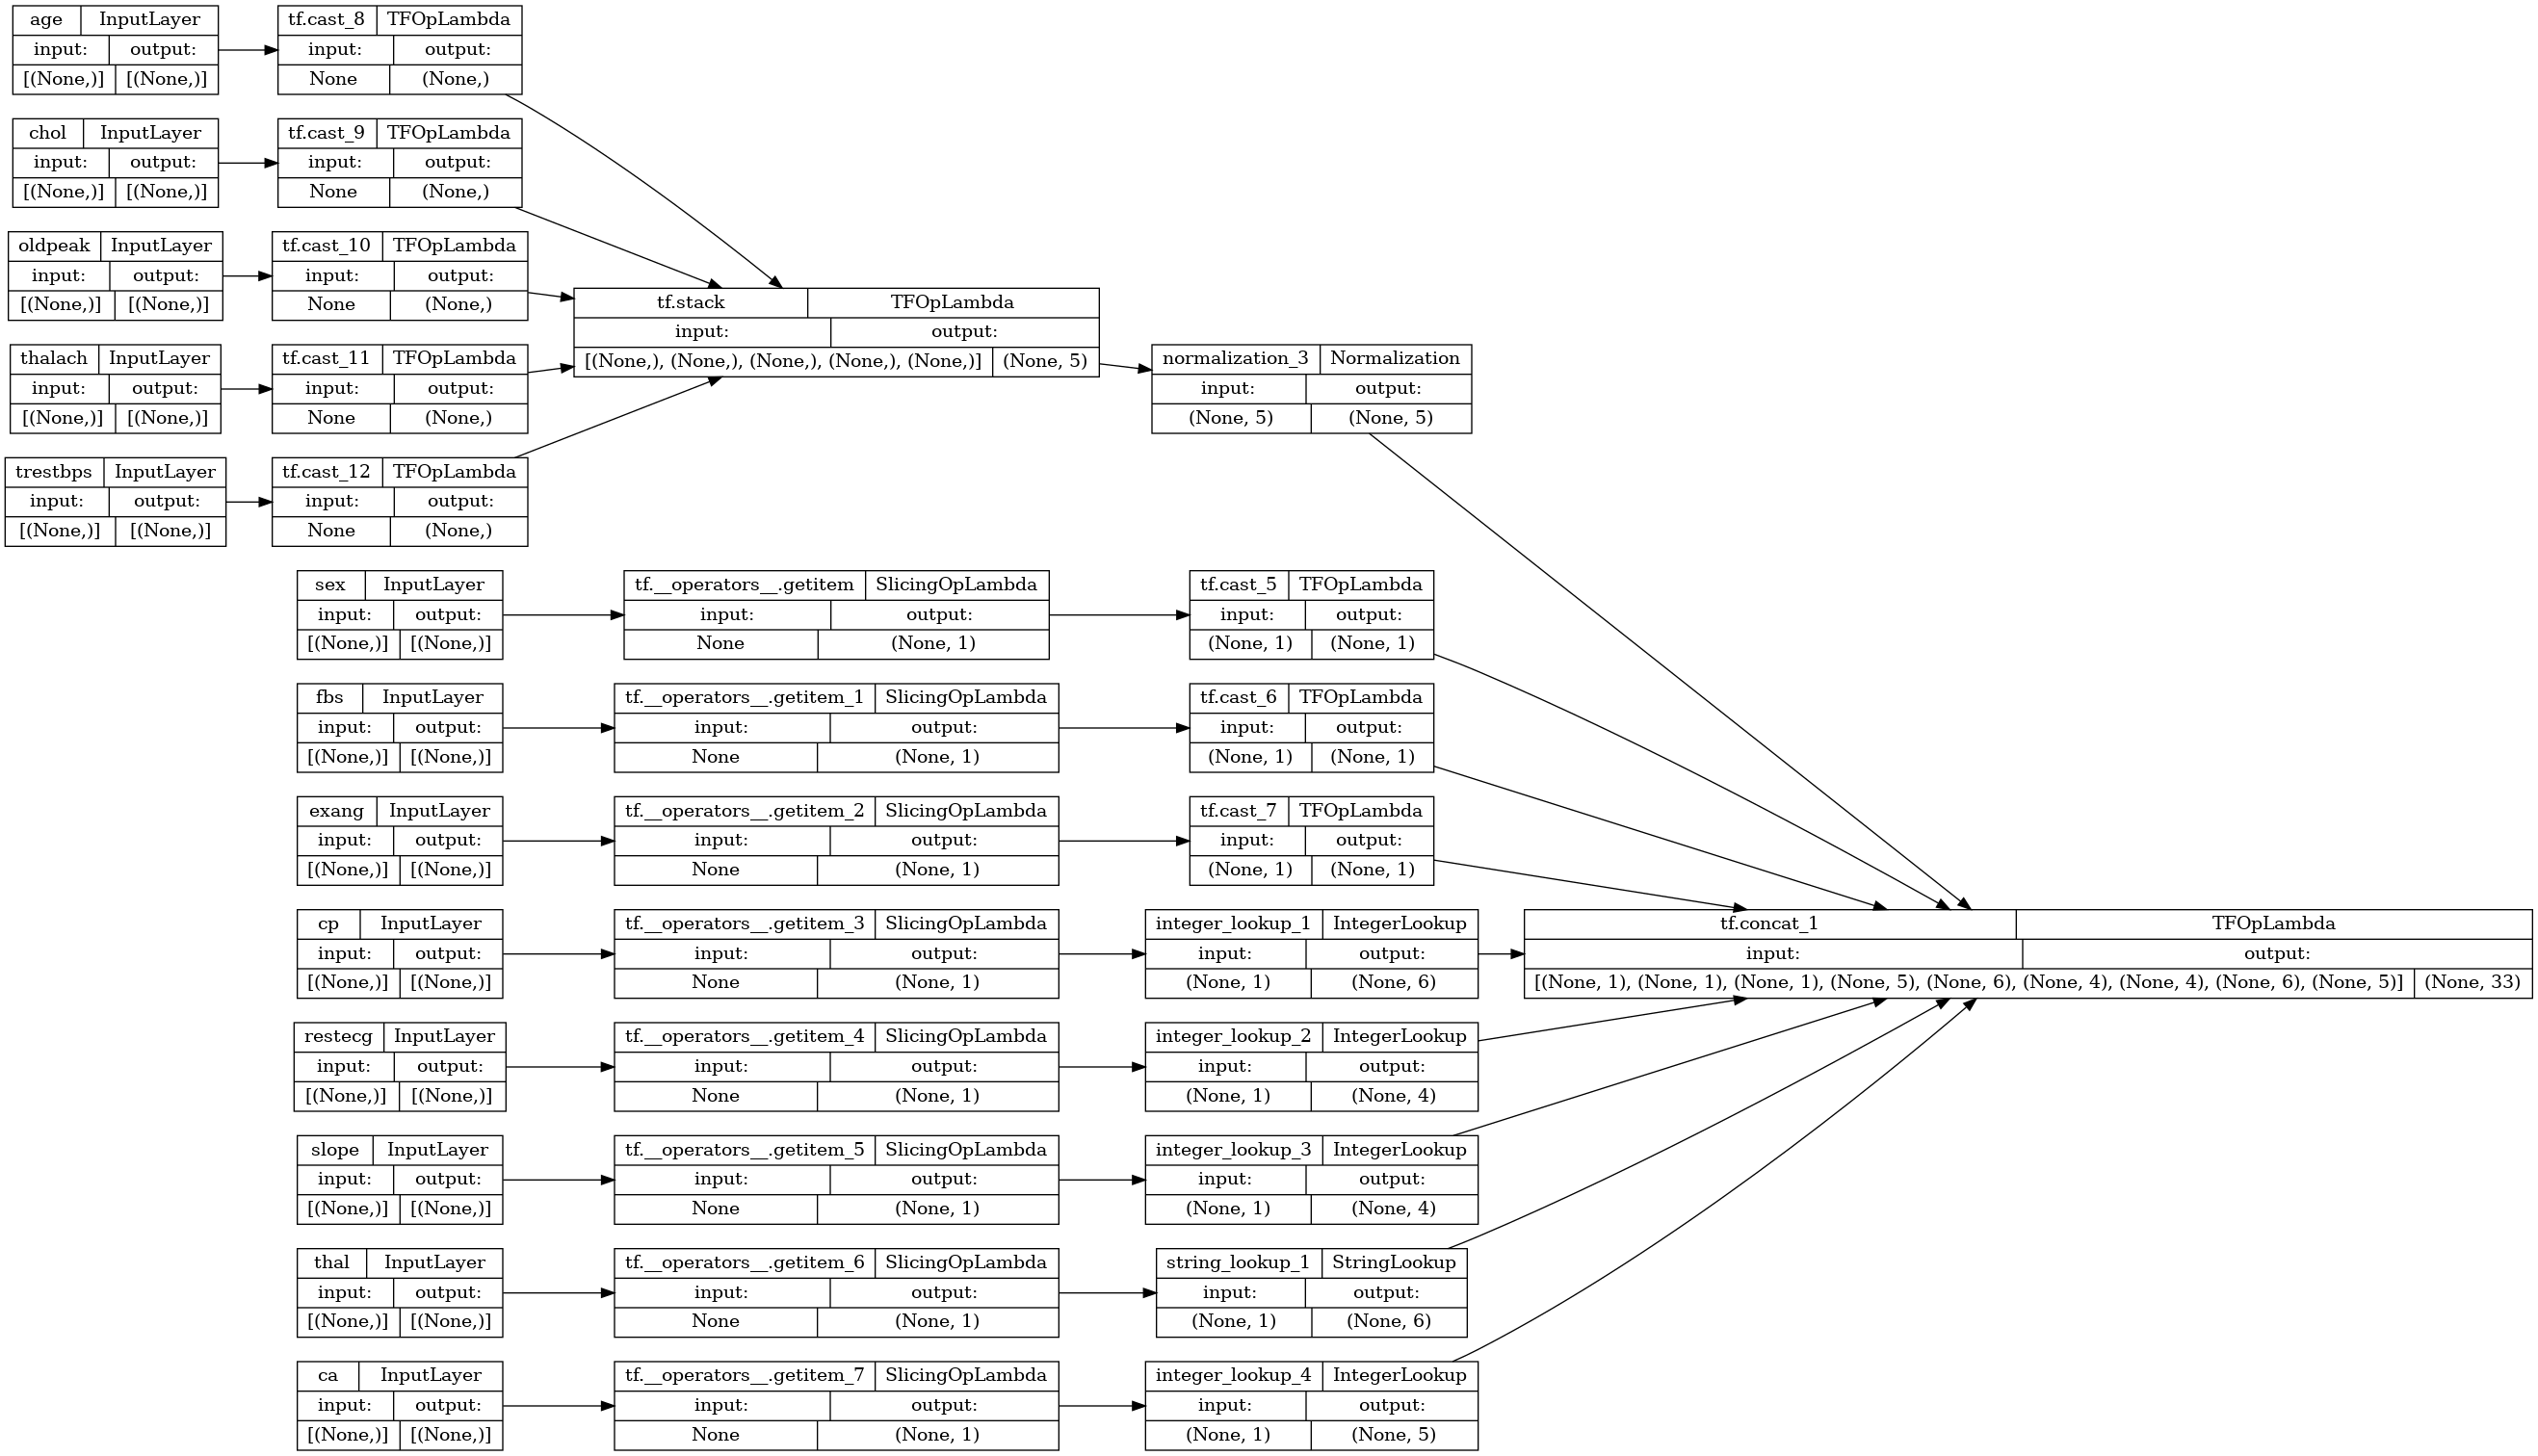

In [41]:
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

プリプロセッサをテストするには、<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" class="external">DataFrame.iloc</a> アクセサを使用して、DataFrame から最初のサンプルをスライスします。次に、それをディクショナリに変換し、ディクショナリをプリプロセッサに渡します。結果は、バイナリ特徴量、正規化された数値特徴量、およびワンホットカテゴリカル特徴量をこの順序で含む単一のベクトルになります。

In [42]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[ 1.        ,  1.        ,  0.        ,  0.93383914, -0.26008663,
         1.0680453 ,  0.03480718,  0.74578077,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]], dtype=float32)>

### モデルを作成して訓練する

次に、モデルの本体を作成します。前の例と同じ構成を使用します。分類には、いくつかの `Dense` 正規化線形レイヤーと `Dense(1)` 出力レイヤーを使用します。

In [43]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

次に、Keras 関数型 API を使用して 2 つの部分を組み合わせます。

In [44]:
inputs

{'age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'age')>,
 'sex': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'sex')>,
 'cp': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'cp')>,
 'trestbps': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'chol')>,
 'fbs': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'fbs')>,
 'restecg': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'restecg')>,
 'thalach': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'thalach')>,
 'exang': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'exang')>,
 'oldpeak': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'oldpeak')>,
 'slope': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'slope')>,
 'ca': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'ca')>,
 'thal': <KerasTensor: shape=(None,) dtype=string 

In [45]:
x = preprocessor(inputs)
x

<KerasTensor: shape=(None, 33) dtype=float32 (created by layer 'model_1')>

In [46]:
result = body(x)
result

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential_3')>

In [47]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

このモデルは、入力のディクショナリを想定しています。データを渡す最も簡単な方法は、DataFrame を dict に変換し、その dict を `x` 引数として `Model.fit` に渡すことです。

In [48]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5


  1/152 [..............................] - ETA: 3:44 - loss: 0.8107 - accuracy: 0.5000

 12/152 [=>............................] - ETA: 0s - loss: 0.7394 - accuracy: 0.5833  

 24/152 [===>..........................] - ETA: 0s - loss: 0.7367 - accuracy: 0.6458

 36/152 [======>.......................] - ETA: 0s - loss: 0.7365 - accuracy: 0.6528

 48/152 [========>.....................] - ETA: 0s - loss: 0.7224 - accuracy: 0.6354

 60/152 [==========>...................] - ETA: 0s - loss: 0.7187 - accuracy: 0.6333

 72/152 [=============>................] - ETA: 0s - loss: 0.7015 - accuracy: 0.6597

 84/152 [===============>..............] - ETA: 0s - loss: 0.6981 - accuracy: 0.6667

 96/152 [=================>............] - ETA: 0s - loss: 0.6885 - accuracy: 0.6823

108/152 [====================>.........] - ETA: 0s - loss: 0.6785 - accuracy: 0.6991

119/152 [======================>.......] - ETA: 0s - loss: 0.6737 - accuracy: 0.7017

131/152 [========================>.....] - ETA: 0s - loss: 0.6645 - accuracy: 0.7099

142/152 [===========================>..] - ETA: 0s - loss: 0.6534 - accuracy: 0.7148

152/152 [==============================] - 2s 4ms/step - loss: 0.6485 - accuracy: 0.7162


Epoch 2/5


  1/152 [..............................] - ETA: 0s - loss: 0.4875 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.5180 - accuracy: 0.8077

 24/152 [===>..........................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7500

 36/152 [======>.......................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7222

 48/152 [========>.....................] - ETA: 0s - loss: 0.5913 - accuracy: 0.6875

 60/152 [==========>...................] - ETA: 0s - loss: 0.5780 - accuracy: 0.7000

 71/152 [=============>................] - ETA: 0s - loss: 0.5557 - accuracy: 0.7324

 83/152 [===============>..............] - ETA: 0s - loss: 0.5352 - accuracy: 0.7530

 95/152 [=================>............] - ETA: 0s - loss: 0.5298 - accuracy: 0.7526

107/152 [====================>.........] - ETA: 0s - loss: 0.5249 - accuracy: 0.7523

119/152 [======================>.......] - ETA: 0s - loss: 0.5240 - accuracy: 0.7521

131/152 [========================>.....] - ETA: 0s - loss: 0.5167 - accuracy: 0.7519

143/152 [===========================>..] - ETA: 0s - loss: 0.5144 - accuracy: 0.7448

152/152 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.7261


Epoch 3/5


  1/152 [..............................] - ETA: 0s - loss: 0.1798 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8077

 25/152 [===>..........................] - ETA: 0s - loss: 0.4393 - accuracy: 0.7600

 37/152 [======>.......................] - ETA: 0s - loss: 0.3997 - accuracy: 0.7973

 49/152 [========>.....................] - ETA: 0s - loss: 0.4089 - accuracy: 0.7755

 61/152 [===========>..................] - ETA: 0s - loss: 0.4181 - accuracy: 0.7623

 73/152 [=============>................] - ETA: 0s - loss: 0.4343 - accuracy: 0.7397

 85/152 [===============>..............] - ETA: 0s - loss: 0.4250 - accuracy: 0.7529

 97/152 [==================>...........] - ETA: 0s - loss: 0.4370 - accuracy: 0.7474

109/152 [====================>.........] - ETA: 0s - loss: 0.4345 - accuracy: 0.7523

121/152 [======================>.......] - ETA: 0s - loss: 0.4288 - accuracy: 0.7479

133/152 [=========================>....] - ETA: 0s - loss: 0.4246 - accuracy: 0.7519

145/152 [===========================>..] - ETA: 0s - loss: 0.4304 - accuracy: 0.7483

152/152 [==============================] - 1s 4ms/step - loss: 0.4411 - accuracy: 0.7426


Epoch 4/5


  1/152 [..............................] - ETA: 0s - loss: 0.1043 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8462

 25/152 [===>..........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.8600

 37/152 [======>.......................] - ETA: 0s - loss: 0.3140 - accuracy: 0.8243

 49/152 [========>.....................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8163

 61/152 [===========>..................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8197

 73/152 [=============>................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8219

 85/152 [===============>..............] - ETA: 0s - loss: 0.3136 - accuracy: 0.8235

 97/152 [==================>...........] - ETA: 0s - loss: 0.3173 - accuracy: 0.8247

109/152 [====================>.........] - ETA: 0s - loss: 0.3314 - accuracy: 0.8257

121/152 [======================>.......] - ETA: 0s - loss: 0.3453 - accuracy: 0.8140

133/152 [=========================>....] - ETA: 0s - loss: 0.3814 - accuracy: 0.7857

145/152 [===========================>..] - ETA: 0s - loss: 0.3862 - accuracy: 0.7828

152/152 [==============================] - 1s 4ms/step - loss: 0.3844 - accuracy: 0.7855


Epoch 5/5


  1/152 [..............................] - ETA: 0s - loss: 0.8663 - accuracy: 0.5000

 13/152 [=>............................] - ETA: 0s - loss: 0.3759 - accuracy: 0.8077

 25/152 [===>..........................] - ETA: 0s - loss: 0.3681 - accuracy: 0.8200

 36/152 [======>.......................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8611

 47/152 [========>.....................] - ETA: 0s - loss: 0.3399 - accuracy: 0.8298

 59/152 [==========>...................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8220

 71/152 [=============>................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8169

 82/152 [===============>..............] - ETA: 0s - loss: 0.3272 - accuracy: 0.8293

 93/152 [=================>............] - ETA: 0s - loss: 0.3240 - accuracy: 0.8333

105/152 [===================>..........] - ETA: 0s - loss: 0.3592 - accuracy: 0.7952

117/152 [======================>.......] - ETA: 0s - loss: 0.3633 - accuracy: 0.8077

129/152 [========================>.....] - ETA: 0s - loss: 0.3477 - accuracy: 0.8217

141/152 [==========================>...] - ETA: 0s - loss: 0.3503 - accuracy: 0.8227

152/152 [==============================] - 1s 4ms/step - loss: 0.3540 - accuracy: 0.8119


`tf.data` を使用しても同様に機能します。

In [49]:
ds = tf.data.Dataset.from_tensor_slices((
    dict(df),
    target
))

ds = ds.batch(BATCH_SIZE)

In [50]:
import pprint

for x, y in ds.take(1):
  pprint.pprint(x)
  print()
  print(y)

{'age': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([63, 67])>,
 'ca': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 3])>,
 'chol': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([233, 286])>,
 'cp': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 4])>,
 'exang': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>,
 'fbs': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>,
 'oldpeak': <tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.3, 1.5])>,
 'restecg': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2])>,
 'sex': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>,
 'slope': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 2])>,
 'thal': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'fixed', b'normal'], dtype=object)>,
 'thalach': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([150, 108])>,
 'trestbps': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([145, 160])>}

tf.Tensor([0 1], shape=(2,), dtype=int64)


In [51]:
history = model.fit(ds, epochs=5)

Epoch 1/5


  1/152 [..............................] - ETA: 1:01 - loss: 0.4044 - accuracy: 1.0000

 12/152 [=>............................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8333  

 24/152 [===>..........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.7708

 36/152 [======>.......................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8056

 48/152 [========>.....................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8542

 60/152 [==========>...................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8583

 71/152 [=============>................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8592

 83/152 [===============>..............] - ETA: 0s - loss: 0.3012 - accuracy: 0.8494

 95/152 [=================>............] - ETA: 0s - loss: 0.2929 - accuracy: 0.8579

107/152 [====================>.........] - ETA: 0s - loss: 0.3273 - accuracy: 0.8271

119/152 [======================>.......] - ETA: 0s - loss: 0.3240 - accuracy: 0.8277

131/152 [========================>.....] - ETA: 0s - loss: 0.3137 - accuracy: 0.8397

143/152 [===========================>..] - ETA: 0s - loss: 0.3235 - accuracy: 0.8357

152/152 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8317


Epoch 2/5


  1/152 [..............................] - ETA: 0s - loss: 0.4012 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.3316 - accuracy: 0.8462

 25/152 [===>..........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7800

 37/152 [======>.......................] - ETA: 0s - loss: 0.3265 - accuracy: 0.8108

 49/152 [========>.....................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8571

 61/152 [===========>..................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8689

 73/152 [=============>................] - ETA: 0s - loss: 0.2937 - accuracy: 0.8630

 85/152 [===============>..............] - ETA: 0s - loss: 0.2815 - accuracy: 0.8706

 97/152 [==================>...........] - ETA: 0s - loss: 0.2932 - accuracy: 0.8608

109/152 [====================>.........] - ETA: 0s - loss: 0.3193 - accuracy: 0.8394

121/152 [======================>.......] - ETA: 0s - loss: 0.3083 - accuracy: 0.8471

133/152 [=========================>....] - ETA: 0s - loss: 0.3067 - accuracy: 0.8534

145/152 [===========================>..] - ETA: 0s - loss: 0.3067 - accuracy: 0.8517

152/152 [==============================] - 1s 4ms/step - loss: 0.3177 - accuracy: 0.8449


Epoch 3/5


  1/152 [..............................] - ETA: 0s - loss: 0.3729 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.3173 - accuracy: 0.8462

 25/152 [===>..........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8200

 37/152 [======>.......................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8378

 49/152 [========>.....................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8776

 61/152 [===========>..................] - ETA: 0s - loss: 0.2722 - accuracy: 0.8852

 73/152 [=============>................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8767

 85/152 [===============>..............] - ETA: 0s - loss: 0.2705 - accuracy: 0.8824

 97/152 [==================>...........] - ETA: 0s - loss: 0.2830 - accuracy: 0.8711

109/152 [====================>.........] - ETA: 0s - loss: 0.3095 - accuracy: 0.8532

121/152 [======================>.......] - ETA: 0s - loss: 0.2982 - accuracy: 0.8595

132/152 [=========================>....] - ETA: 0s - loss: 0.2877 - accuracy: 0.8674

144/152 [===========================>..] - ETA: 0s - loss: 0.2984 - accuracy: 0.8646

152/152 [==============================] - 1s 4ms/step - loss: 0.3067 - accuracy: 0.8581


Epoch 4/5


  1/152 [..............................] - ETA: 0s - loss: 0.3449 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8462

 25/152 [===>..........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8200

 37/152 [======>.......................] - ETA: 0s - loss: 0.3017 - accuracy: 0.8378

 49/152 [========>.....................] - ETA: 0s - loss: 0.2594 - accuracy: 0.8776

 60/152 [==========>...................] - ETA: 0s - loss: 0.2662 - accuracy: 0.8833

 71/152 [=============>................] - ETA: 0s - loss: 0.2788 - accuracy: 0.8732

 82/152 [===============>..............] - ETA: 0s - loss: 0.2658 - accuracy: 0.8780

 93/152 [=================>............] - ETA: 0s - loss: 0.2653 - accuracy: 0.8817

104/152 [===================>..........] - ETA: 0s - loss: 0.2833 - accuracy: 0.8606

115/152 [=====================>........] - ETA: 0s - loss: 0.2920 - accuracy: 0.8609

126/152 [=======================>......] - ETA: 0s - loss: 0.2869 - accuracy: 0.8651

137/152 [==========================>...] - ETA: 0s - loss: 0.2934 - accuracy: 0.8613

148/152 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.8581

152/152 [==============================] - 1s 5ms/step - loss: 0.2979 - accuracy: 0.8581


Epoch 5/5


  1/152 [..............................] - ETA: 0s - loss: 0.3170 - accuracy: 1.0000

 13/152 [=>............................] - ETA: 0s - loss: 0.2921 - accuracy: 0.8462

 25/152 [===>..........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8400

 37/152 [======>.......................] - ETA: 0s - loss: 0.2919 - accuracy: 0.8378

 49/152 [========>.....................] - ETA: 0s - loss: 0.2515 - accuracy: 0.8776

 61/152 [===========>..................] - ETA: 0s - loss: 0.2563 - accuracy: 0.8852

 73/152 [=============>................] - ETA: 0s - loss: 0.2687 - accuracy: 0.8767

 85/152 [===============>..............] - ETA: 0s - loss: 0.2551 - accuracy: 0.8824

 97/152 [==================>...........] - ETA: 0s - loss: 0.2694 - accuracy: 0.8660

109/152 [====================>.........] - ETA: 0s - loss: 0.2954 - accuracy: 0.8532

121/152 [======================>.......] - ETA: 0s - loss: 0.2836 - accuracy: 0.8595

133/152 [=========================>....] - ETA: 0s - loss: 0.2809 - accuracy: 0.8647

145/152 [===========================>..] - ETA: 0s - loss: 0.2818 - accuracy: 0.8655

152/152 [==============================] - 1s 4ms/step - loss: 0.2905 - accuracy: 0.8581
